<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_2750-2800.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3485]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [3486]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

RDKit ERROR: [06:09:59] non-ring atom 1 marked aromatic


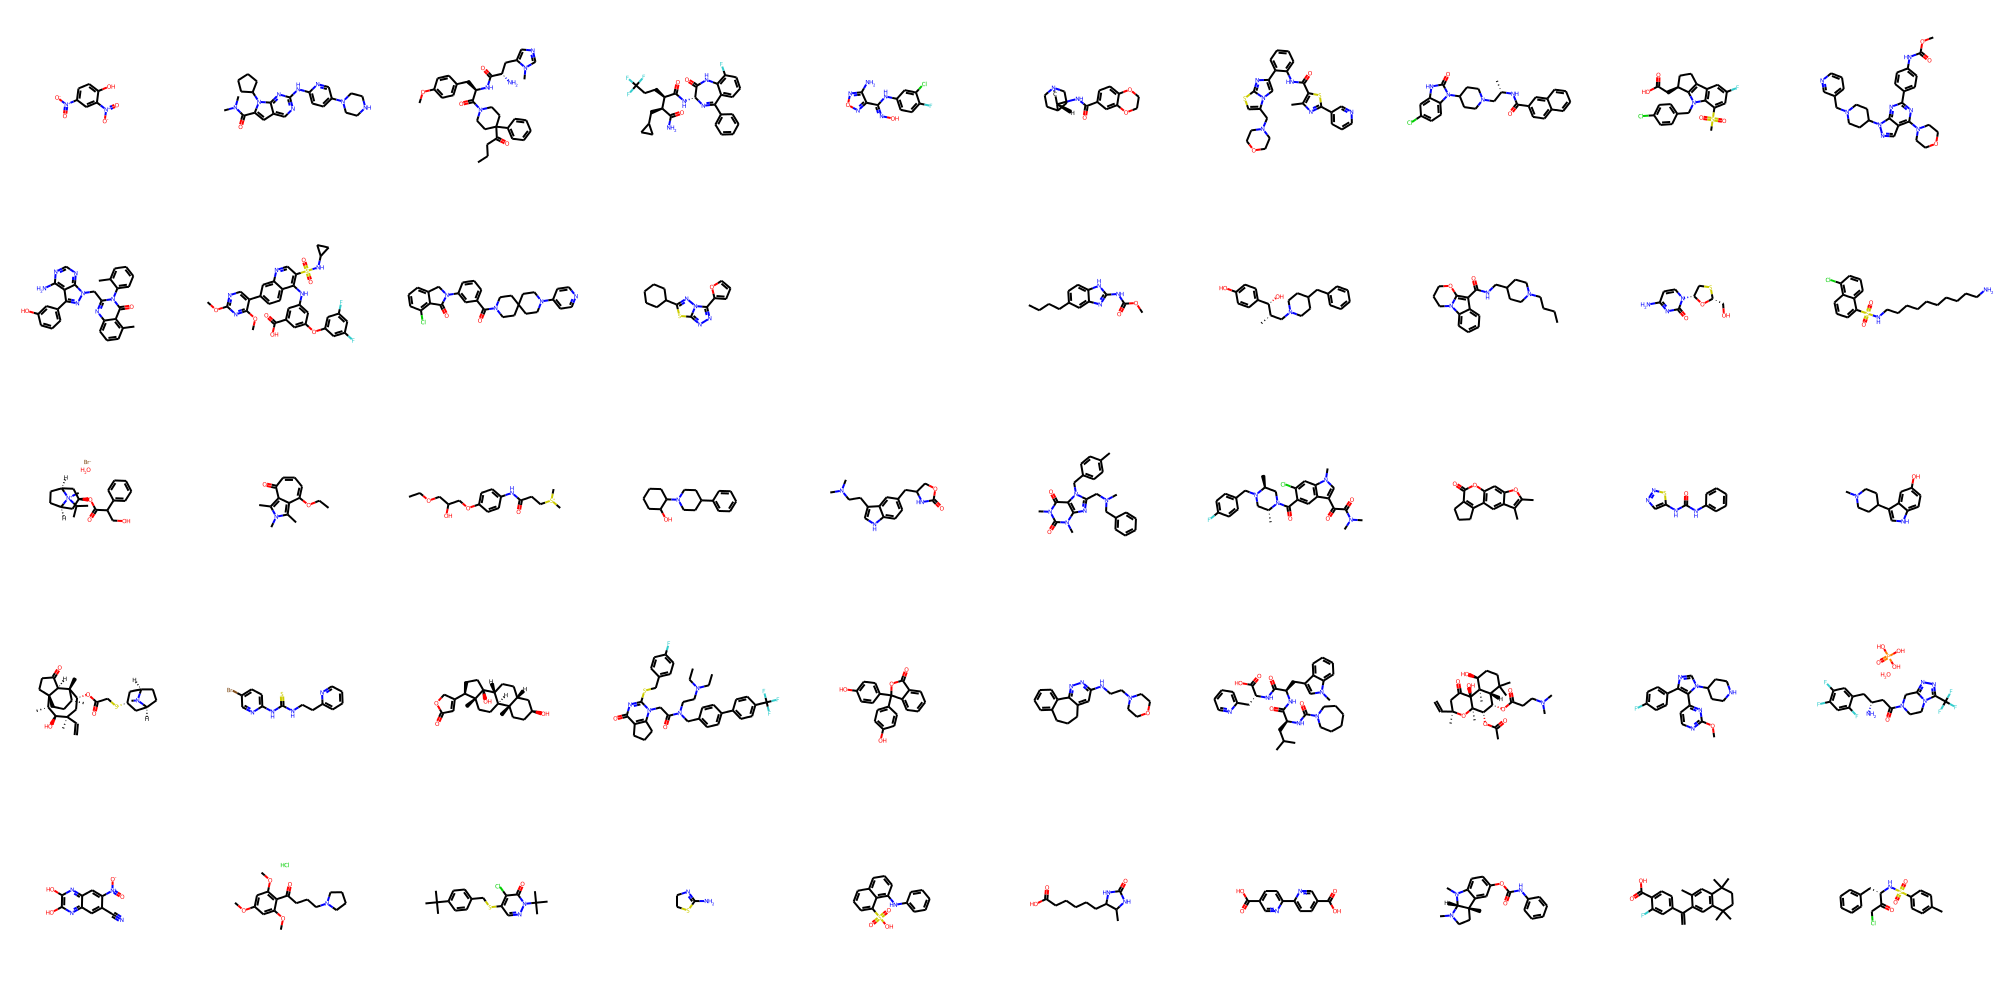

In [3487]:
smiles_list = [

'O=[N+]([O-])c1ccc(O)c([N+](=O)[O-])c1',
'CN(C)C(=O)c1cc2cnc(Nc3ccc(N4CCNCC4)cn3)nc2n1C1CCCC1',
'CCCC(=O)C1(c2ccccc2)CCN(C(=O)[C@@H](Cc2ccc(OC)cc2)NC(=O)[C@@H](N)Cc2cncn2C)CC1',
'NC(=O)[C@@H](CC1CC1)[C@@H](CCC(F)(F)F)C(=O)N[C@H]1N=C(c2ccccc2)c2cccc(F)c2NC1=O',
'Nc1nonc1/C(=N/O)Nc1ccc(F)c(Cl)c1',
'O=C(N[C@H]1CN2CCC1CC2)c1ccc2c(c1)OCCO2',
'Cc1nc(-c2cccnc2)sc1C(=O)Nc1ccccc1-c1cn2c(CN3CCOCC3)csc2n1',
'C[C@@H](CN1CCC(n2c(=O)[nH]c3cc(Cl)ccc32)CC1)NC(=O)c1ccc2ccccc2c1',
'CS(=O)(=O)c1cc(F)cc2c3c(n(Cc4ccc(Cl)cc4)c12)[C@@H](CC(=O)O)CC3',
'COC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5cccnc5)CC4)c3n2)cc1',
'Cc1ccccc1-n1c(Cn2nc(-c3cccc(O)c3)c3c(N)ncnc32)nc2cccc(C)c2c1=O',
'COc1ncc(-c2ccc3c(Nc4cc(Oc5cc(F)cc(F)c5)cc(C(=O)O)c4)c(S(=O)(=O)NC4CC4)cnc3c2)c(OC)n1',
'O=C(c1cccc(N2Cc3cccc(Cl)c3C2=O)c1)N1CCC2(CC1)CCN(c1ccncc1)CC2',
'c1coc(-c2nnc3sc(C4CCCCC4)nn23)c1',
'No Data',
'CCCCc1ccc2[nH]c(NC(=O)OC)nc2c1',
'C[C@@H](CN1CCC(Cc2ccccc2)CC1)[C@@H](O)c1ccc(O)cc1',
'CCCCN1CCC(CNC(=O)c2c3n(c4ccccc24)CCCO3)CC1',
'Nc1ccn([C@@H]2CS[C@H](CO)O2)c(=O)n1',
'NCCCCCCCCCCNS(=O)(=O)c1cccc2c(Cl)cccc12',
'CC(C)[N+]1(C)[C@H]2CC[C@@H]1C[C@H](OC(=O)C(CO)c1ccccc1)C2.O.[Br-]',
'CCOc1cccc(=O)c2c(C)n(C)c(C)c12',
'CCOCC(O)COc1ccc(NC(=O)CC[S+](C)C)cc1',
'OC1CCCCC1N1CCC(c2ccccc2)CC1',
'CN(C)CCc1c[nH]c2ccc(CC3COC(=O)N3)cc12',
'Cc1ccc(Cn2c(CN(C)Cc3ccccc3)nc3c2c(=O)n(C)c(=O)n3C)cc1',
'C[C@H]1CN(C(=O)c2cc3c(C(=O)C(=O)N(C)C)cn(C)c3cc2Cl)[C@H](C)CN1Cc1ccc(F)cc1',
'Cc1oc2cc3oc(=O)c4c(c3cc2c1C)CCC4',
'O=C(Nc1ccccc1)Nc1cnns1',
'CN1CCC(c2c[nH]c3ccc(O)cc23)CC1',
'C=C[C@]1(C)C[C@@H](OC(=O)CS[C@H]2C[C@@H]3CC[C@H](C2)N3C)[C@]2(C)[C@H](C)CC[C@]3(CCC(=O)[C@H]32)[C@@H](C)[C@@H]1O',
'S=C(NCCc1ccccn1)Nc1ccc(Br)cn1',
'C[C@]12CC[C@H](O)C[C@H]1CC[C@@H]1[C@@H]2CC[C@]2(C)[C@@H](C3=CC(=O)OC3)CC[C@]12O',
'CCN(CC)CCN(Cc1ccc(-c2ccc(C(F)(F)F)cc2)cc1)C(=O)Cn1c(SCc2ccc(F)cc2)nc(=O)c2c1CCC2',
'O=C1OC(c2ccc(O)cc2)(c2ccc(O)cc2)c2ccccc21',
'c1ccc2c(c1)CCCc1cc(NCCN3CCOCC3)nnc1-2',
'CC(C)C[C@H](NC(=O)N1CCCCCC1)C(=O)N[C@H](Cc1cn(C)c2ccccc12)C(=O)N[C@H](Cc1ccccn1)C(=O)O',
'C=C[C@@]1(C)CC(=O)[C@@]2(O)[C@](C)(O1)[C@@H](OC(C)=O)[C@@H](OC(=O)CCN(C)C)[C@H]1C(C)(C)CC[C@H](O)[C@@]12C',
'COc1nccc(-c2c(-c3ccc(F)cc3)ncn2C2CCNCC2)n1',
'N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)c(F)cc1F.O.O=P(O)(O)O',
'N#Cc1cc2nc(O)c(O)nc2cc1[N+](=O)[O-]',
'COc1cc(OC)c(C(=O)CCCN2CCCC2)c(OC)c1.Cl',
'CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1',
'NC1=NCCS1',
'O=S(=O)(O)c1cccc2cccc(Nc3ccccc3)c12',
'CC1NC(=O)NC1CCCCCC(=O)O',
'O=C(O)c1ccc(-c2ccc(C(=O)O)cn2)nc1',
'CN1CC[C@@]2(C)c3cc(OC(=O)Nc4ccccc4)ccc3N(C)[C@@H]12',
'C=C(c1ccc(C(=O)O)c(F)c1)c1cc2c(cc1C)C(C)(C)CCC2(C)C',
'Cc1ccc(S(=O)(=O)N[C@@H](Cc2ccccc2)C(=O)CCl)cc1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



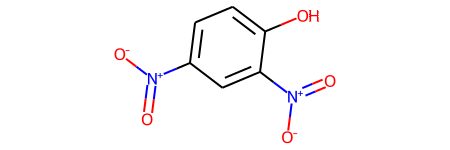

In [3488]:
M1 = mol_list [0]
M1

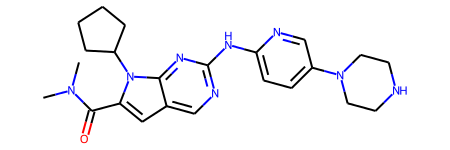

In [3489]:
M2 = mol_list [1]
M2

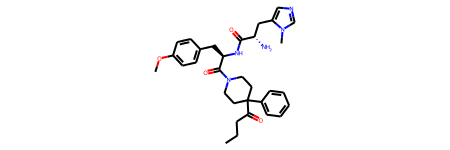

In [3490]:
M3 = mol_list [2]
M3

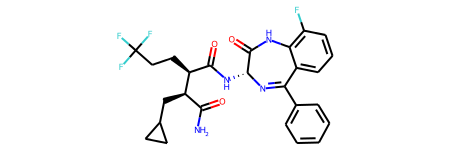

In [3491]:
M4 = mol_list [3]
M4

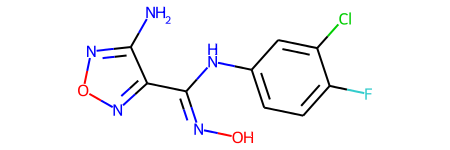

In [3492]:
M5 = mol_list [4]
M5

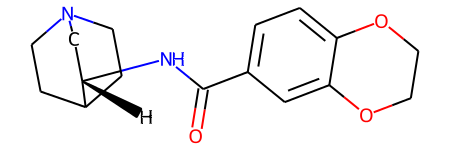

In [3493]:
M6 = mol_list [5]
M6

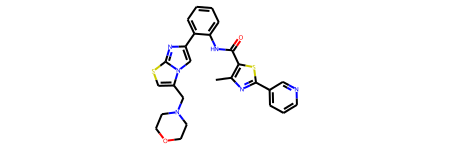

In [3494]:
M7 = mol_list [6]
M7

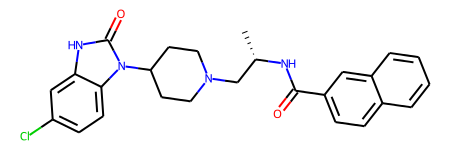

In [3495]:
M8 = mol_list [7]
M8

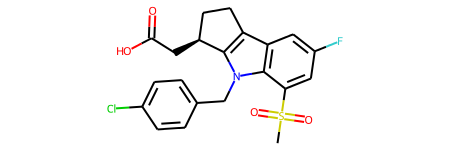

In [3496]:
M9 = mol_list [8]
M9

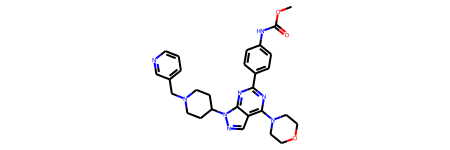

In [3497]:
M10 = mol_list [9]
M10

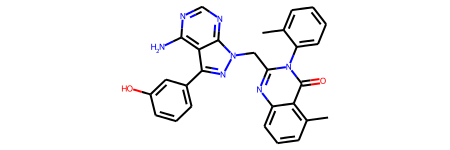

In [3498]:
M11 = mol_list [10]
M11

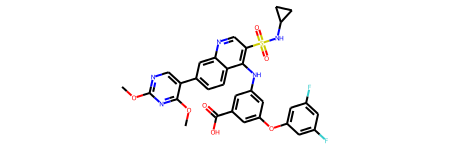

In [3499]:
M12 = mol_list [11]
M12

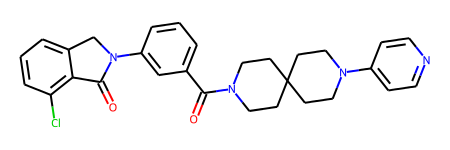

In [3500]:
M13 = mol_list [12]
M13

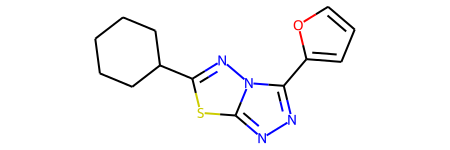

In [3501]:
M14 = mol_list [13]
M14

In [3502]:
M15 = mol_list [14]
M15

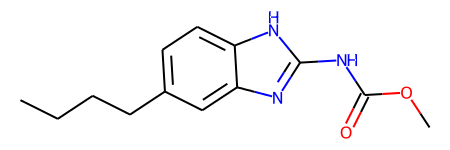

In [3503]:
M16 = mol_list [15]
M16

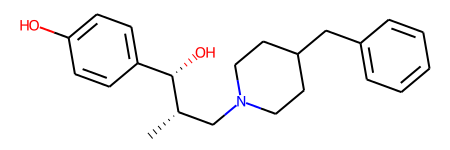

In [3504]:
M17 = mol_list [16]
M17

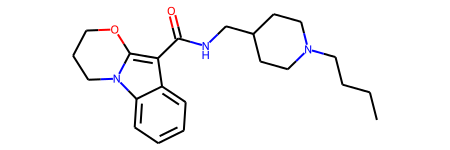

In [3505]:
M18 = mol_list [17]
M18

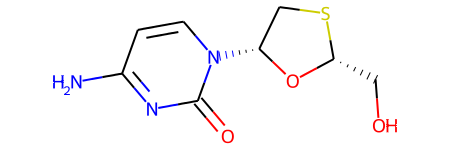

In [3506]:
M19 = mol_list [18]
M19

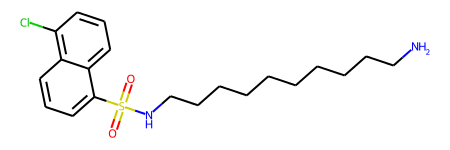

In [3507]:
M20 = mol_list [19]
M20

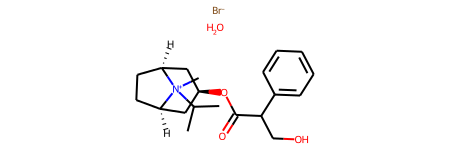

In [3508]:
M21 = mol_list [20]
M21

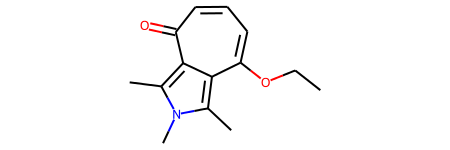

In [3509]:
M22 = mol_list [21]
M22

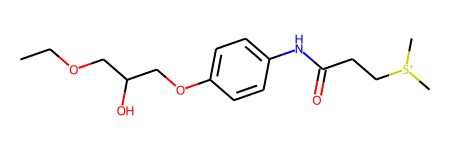

In [3510]:
M23 = mol_list [22]
M23

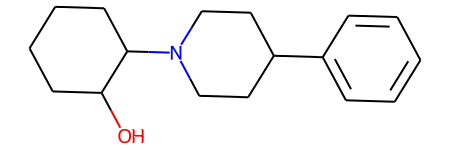

In [3511]:
M24 = mol_list [23]
M24

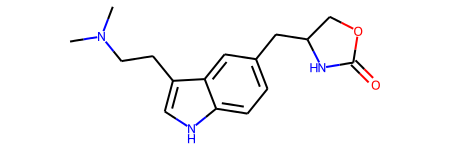

In [3512]:
M25 = mol_list [24]
M25

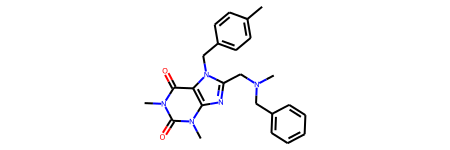

In [3513]:
M26 = mol_list [25]
M26

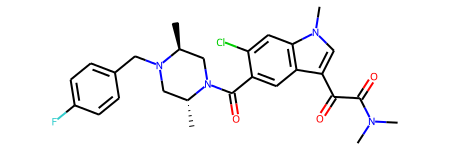

In [3514]:
M27 = mol_list [26]
M27

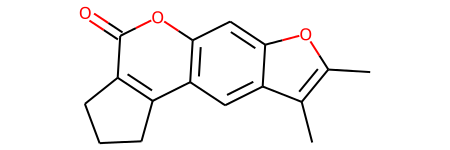

In [3515]:
M28 = mol_list [27]
M28

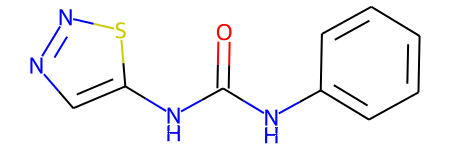

In [3516]:
M29 = mol_list [28]
M29

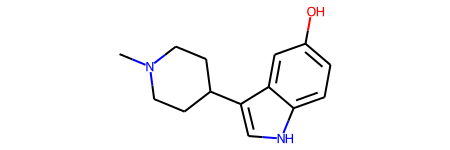

In [3517]:
M30 = mol_list [29]
M30

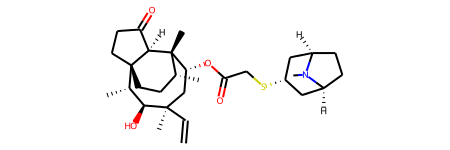

In [3518]:
M31 = mol_list [30]
M31

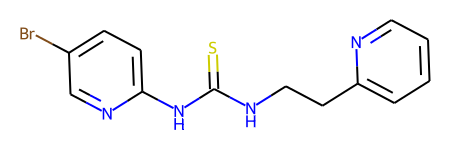

In [3519]:
M32 = mol_list [31]
M32

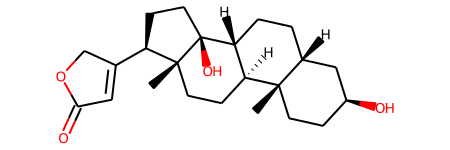

In [3520]:
M33 = mol_list [32]
M33

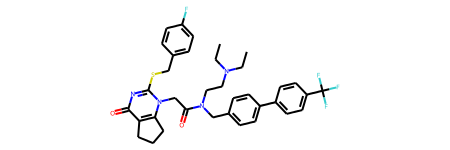

In [3521]:
M34 = mol_list [33]
M34

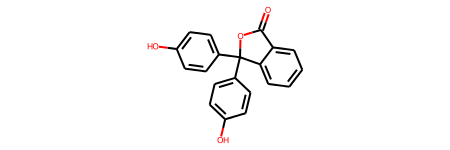

In [3522]:
M35 = mol_list [34]
M35

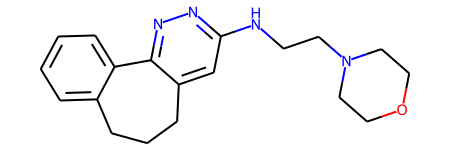

In [3523]:
M36 = mol_list [35]
M36

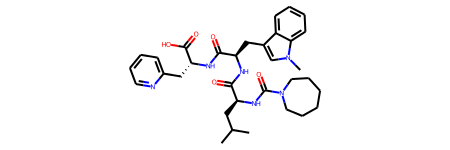

In [3524]:
M37= mol_list [36]
M37

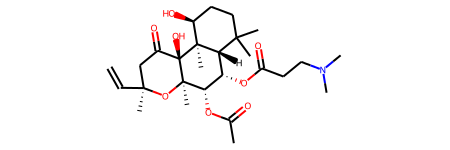

In [3525]:
M38= mol_list [37]
M38

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


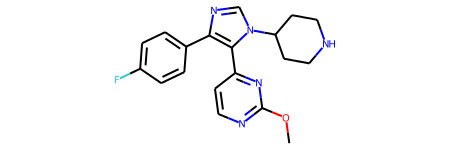

In [3526]:
M39= mol_list [38]
M39

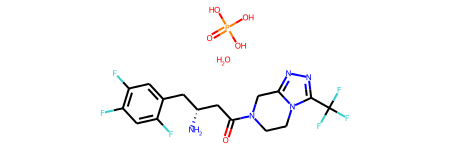

In [3527]:
M40= mol_list [39]
M40

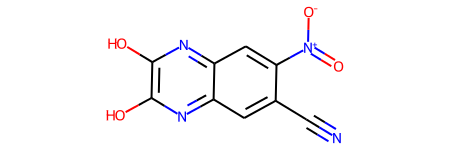

In [3528]:
M41= mol_list [40]
M41

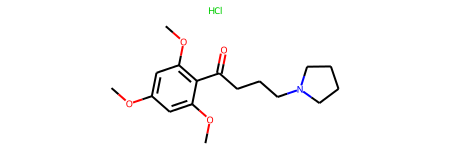

In [3529]:
M42= mol_list [41]
M42

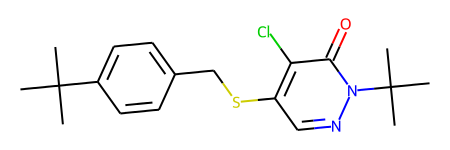

In [3530]:
M43= mol_list [42]
M43

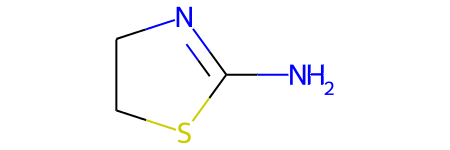

In [3531]:
M44= mol_list [43]
M44

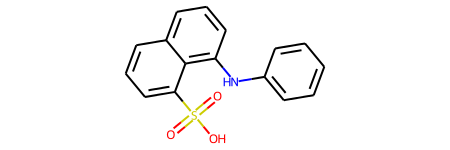

In [3532]:
M45= mol_list [44]
M45

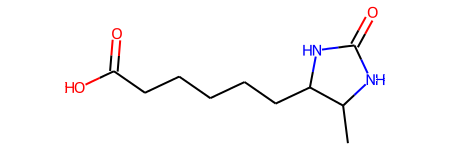

In [3533]:
M46= mol_list [45]
M46

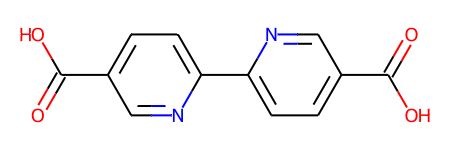

In [3534]:
M47= mol_list [46]
M47

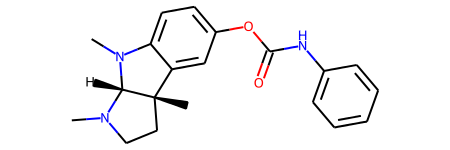

In [3535]:
M48= mol_list [47]
M48

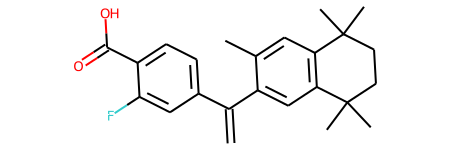

In [3536]:
M49= mol_list [48]
M49

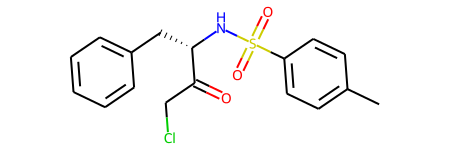

In [3537]:
M50= mol_list [49]
M50

In [3538]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[155,
 171,
 199,
 250,
 354,
 356,
 442,
 451,
 578,
 583,
 650,
 715,
 716,
 726,
 753,
 785,
 790,
 807,
 838,
 849,
 875,
 916,
 939]

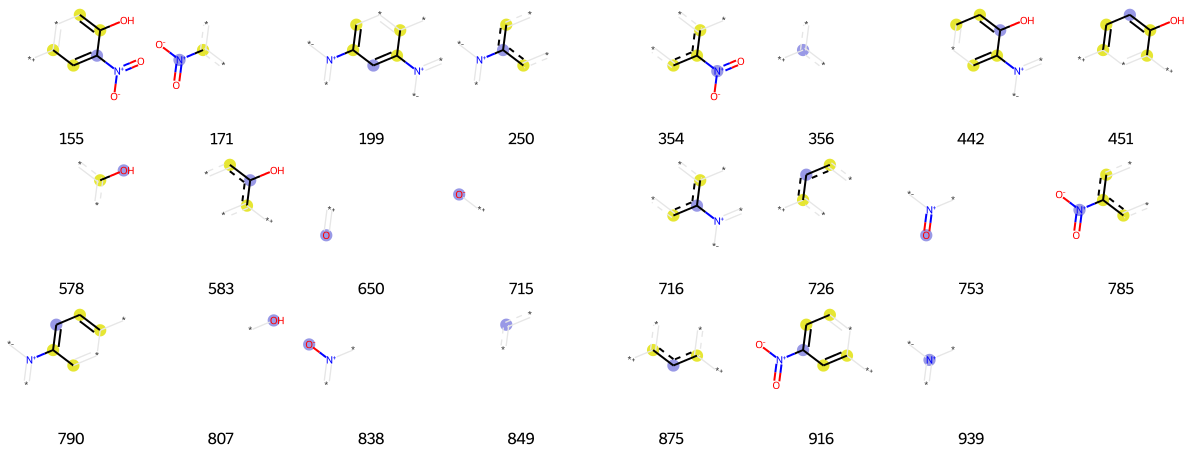

In [3539]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [3540]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[4,
 20,
 33,
 36,
 37,
 75,
 90,
 128,
 139,
 152,
 197,
 222,
 233,
 244,
 284,
 301,
 305,
 356,
 369,
 378,
 407,
 428,
 456,
 458,
 488,
 491,
 492,
 507,
 511,
 541,
 544,
 558,
 629,
 650,
 672,
 687,
 726,
 770,
 781,
 800,
 801,
 804,
 807,
 831,
 849,
 875,
 881,
 886,
 890,
 893,
 910,
 926,
 931,
 934,
 935,
 967,
 969,
 996,
 1019,
 1022]

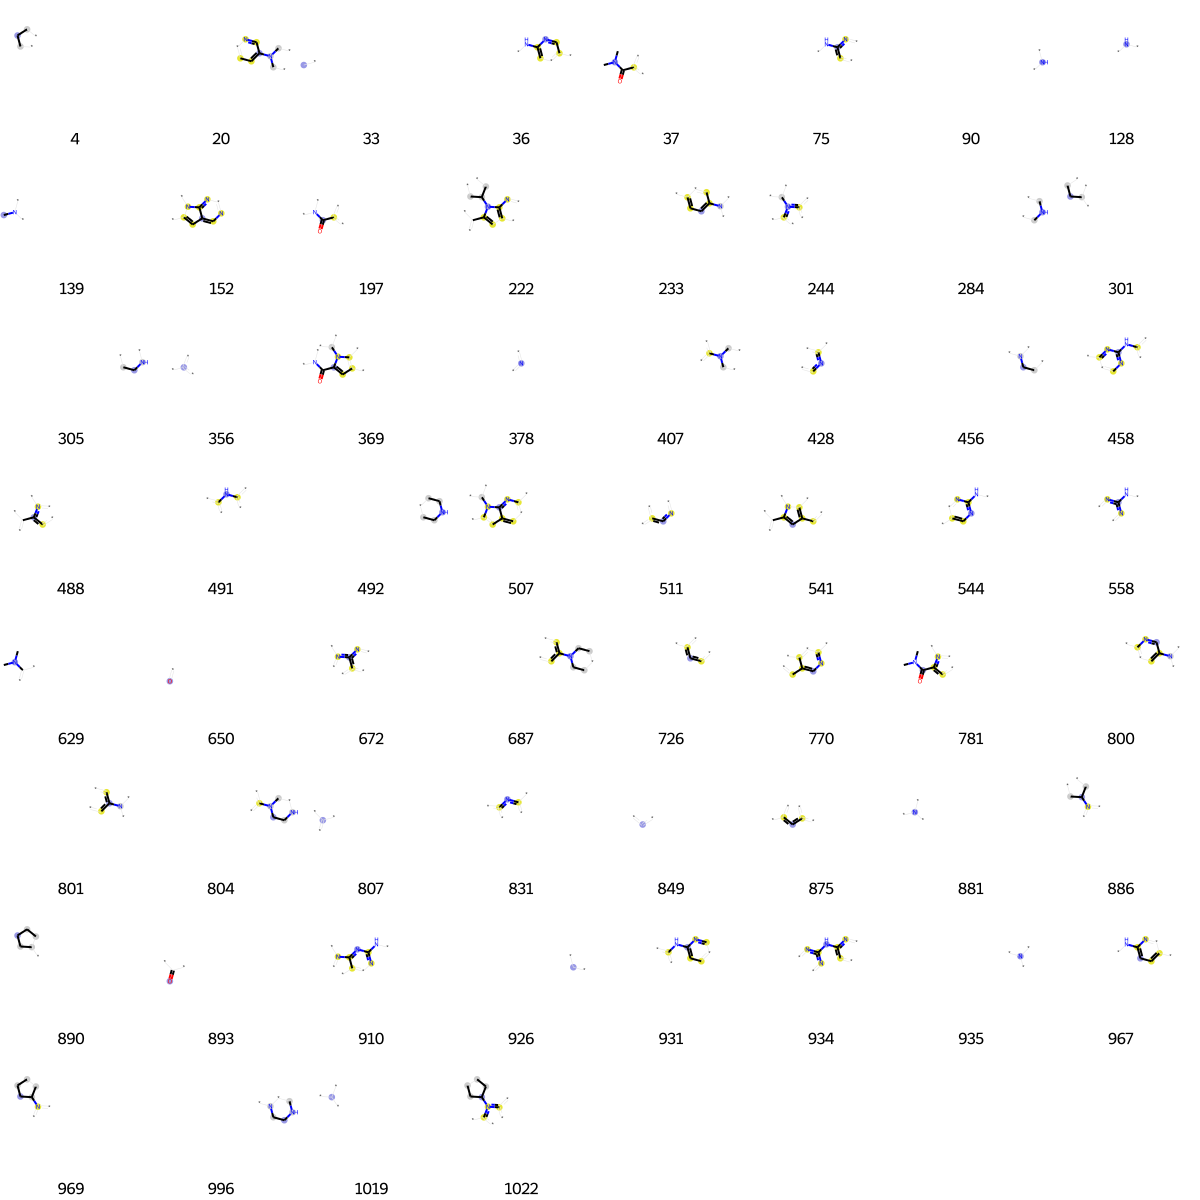

In [3541]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [3542]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 23,
 33,
 36,
 64,
 79,
 80,
 108,
 117,
 121,
 128,
 135,
 136,
 138,
 147,
 165,
 175,
 182,
 246,
 292,
 294,
 310,
 322,
 327,
 333,
 356,
 378,
 385,
 389,
 411,
 456,
 499,
 511,
 512,
 526,
 540,
 556,
 573,
 575,
 579,
 641,
 650,
 695,
 710,
 718,
 726,
 730,
 736,
 751,
 770,
 772,
 781,
 786,
 794,
 807,
 825,
 831,
 841,
 849,
 857,
 890,
 893,
 926,
 932,
 935,
 966,
 973,
 982,
 985,
 992,
 1006]

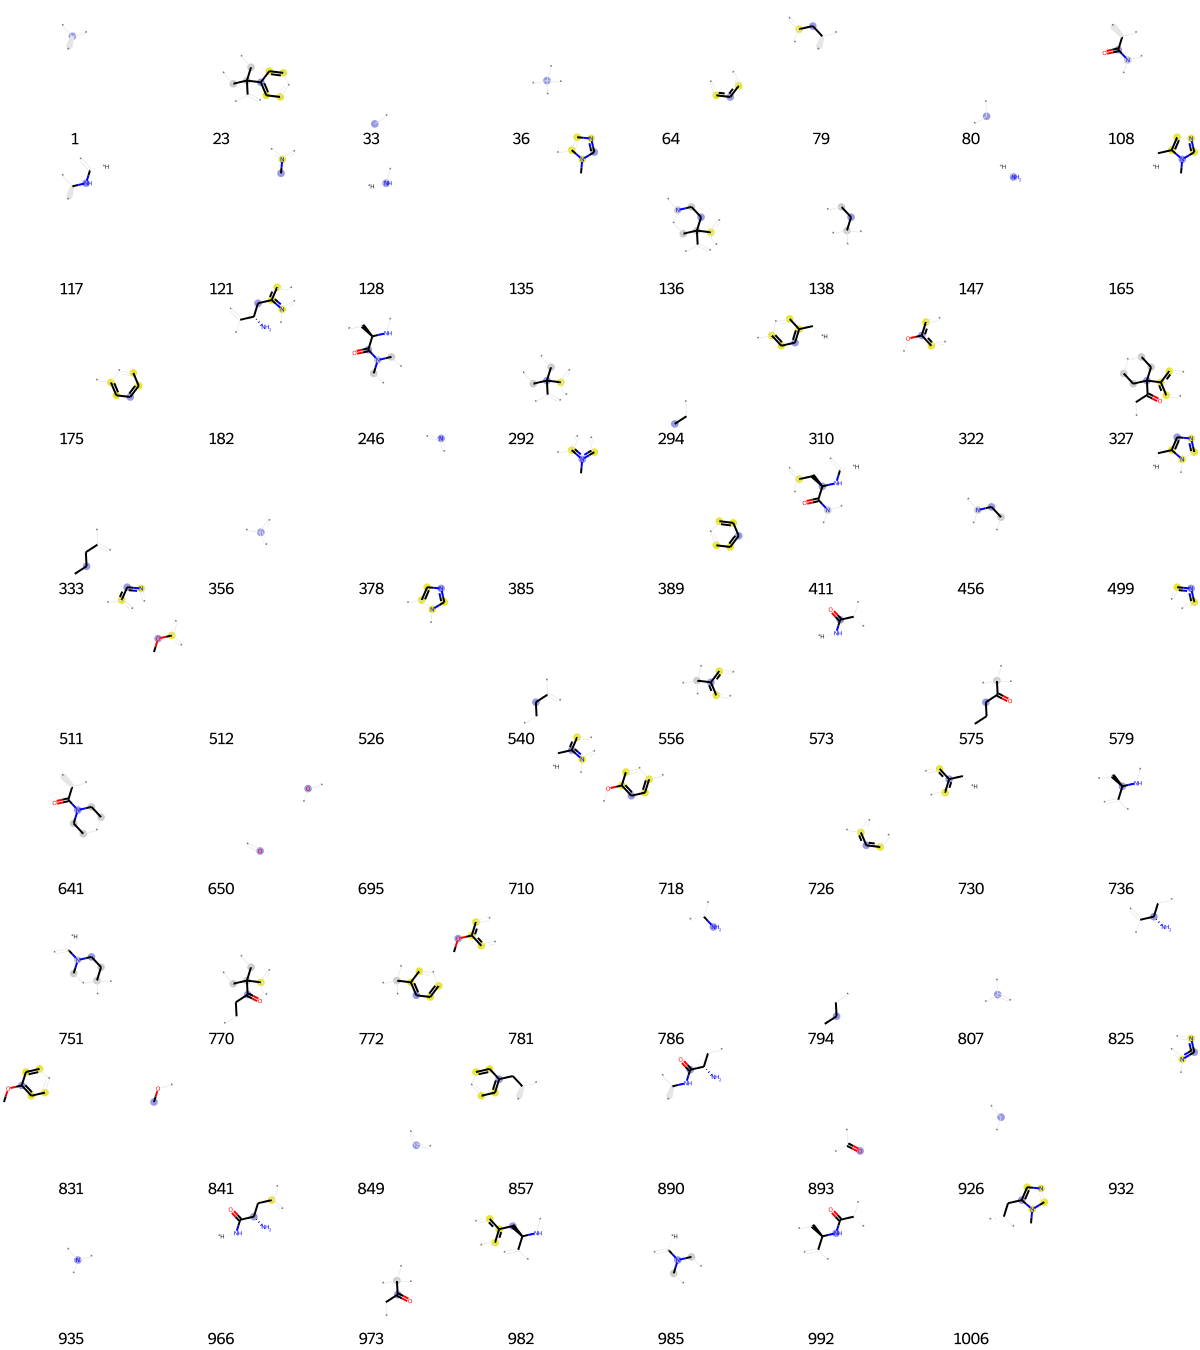

In [3543]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [3544]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[1,
 8,
 10,
 15,
 24,
 29,
 36,
 38,
 62,
 64,
 77,
 80,
 90,
 106,
 110,
 114,
 128,
 136,
 140,
 147,
 154,
 168,
 175,
 182,
 188,
 213,
 284,
 297,
 301,
 314,
 328,
 352,
 356,
 378,
 387,
 389,
 429,
 455,
 457,
 507,
 541,
 547,
 573,
 576,
 647,
 650,
 682,
 694,
 699,
 724,
 726,
 736,
 739,
 807,
 816,
 849,
 869,
 893,
 904,
 926,
 954,
 958,
 969,
 984,
 1019]

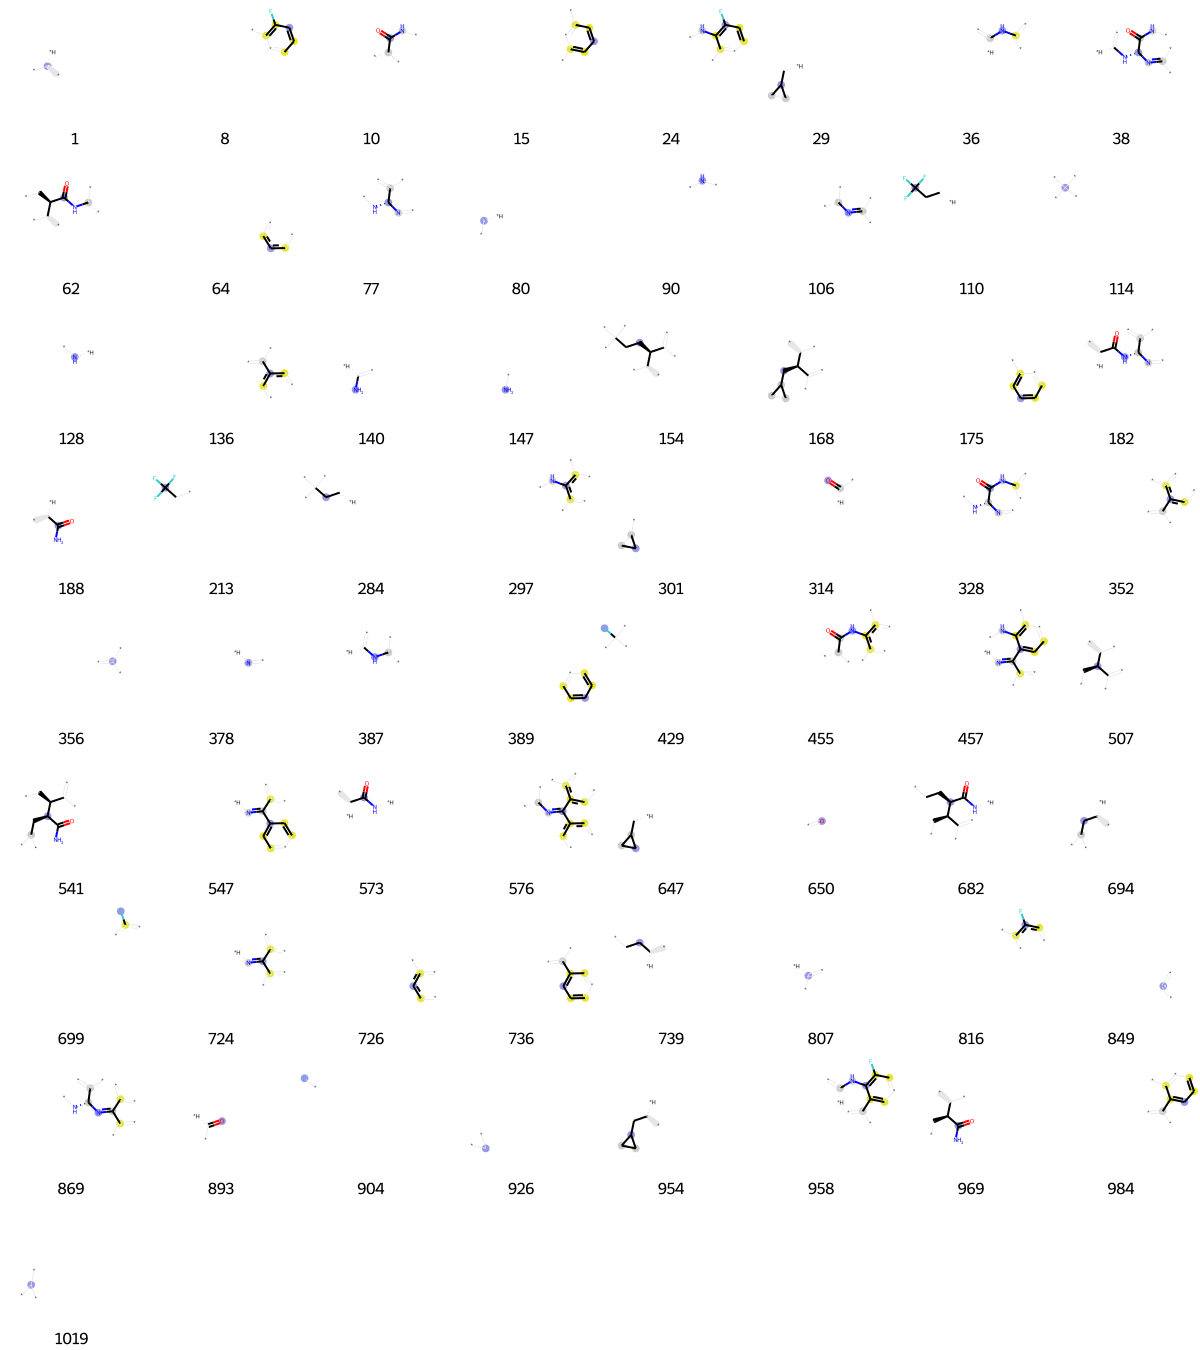

In [3545]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [3546]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[79,
 91,
 128,
 147,
 184,
 191,
 214,
 216,
 289,
 343,
 356,
 366,
 378,
 417,
 433,
 435,
 464,
 465,
 490,
 518,
 537,
 557,
 561,
 656,
 659,
 699,
 725,
 726,
 738,
 792,
 807,
 816,
 843,
 849,
 870,
 875,
 904,
 906]

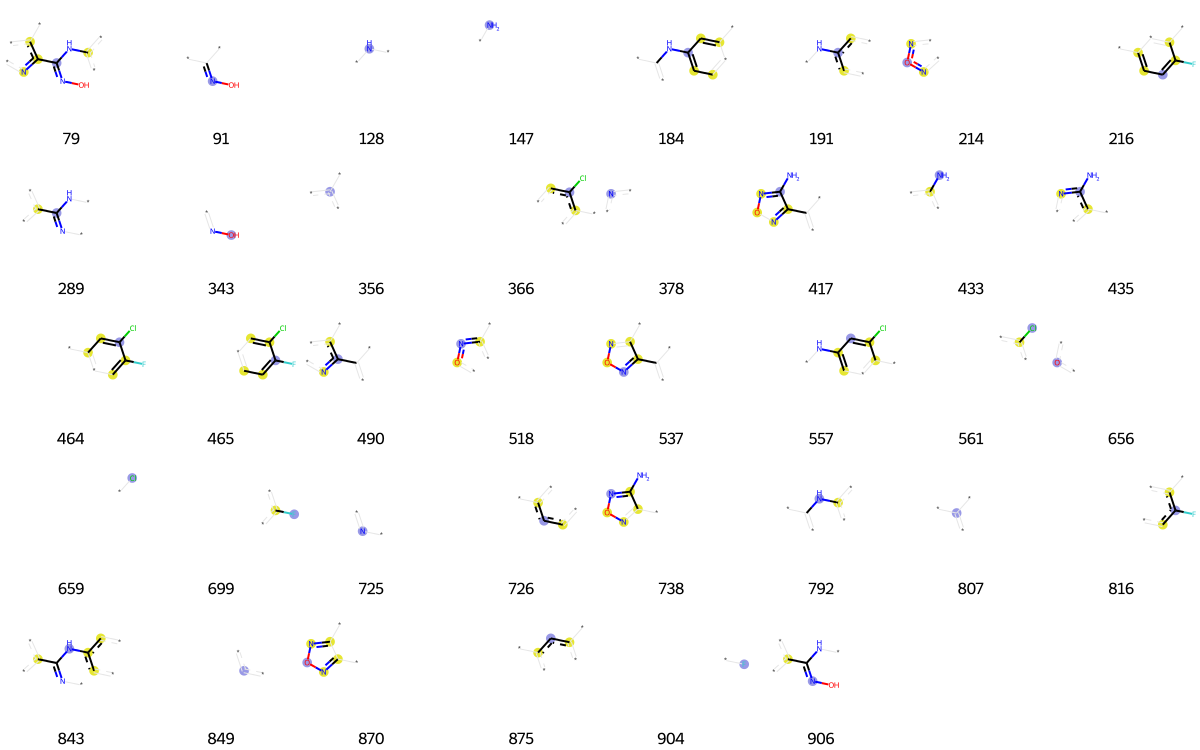

In [3547]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [3548]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[11,
 128,
 190,
 191,
 225,
 284,
 301,
 356,
 361,
 379,
 387,
 441,
 449,
 456,
 486,
 505,
 526,
 531,
 549,
 585,
 623,
 650,
 656,
 660,
 673,
 726,
 729,
 738,
 739,
 807,
 836,
 849,
 875,
 881,
 893,
 897,
 926,
 935,
 950,
 1019]

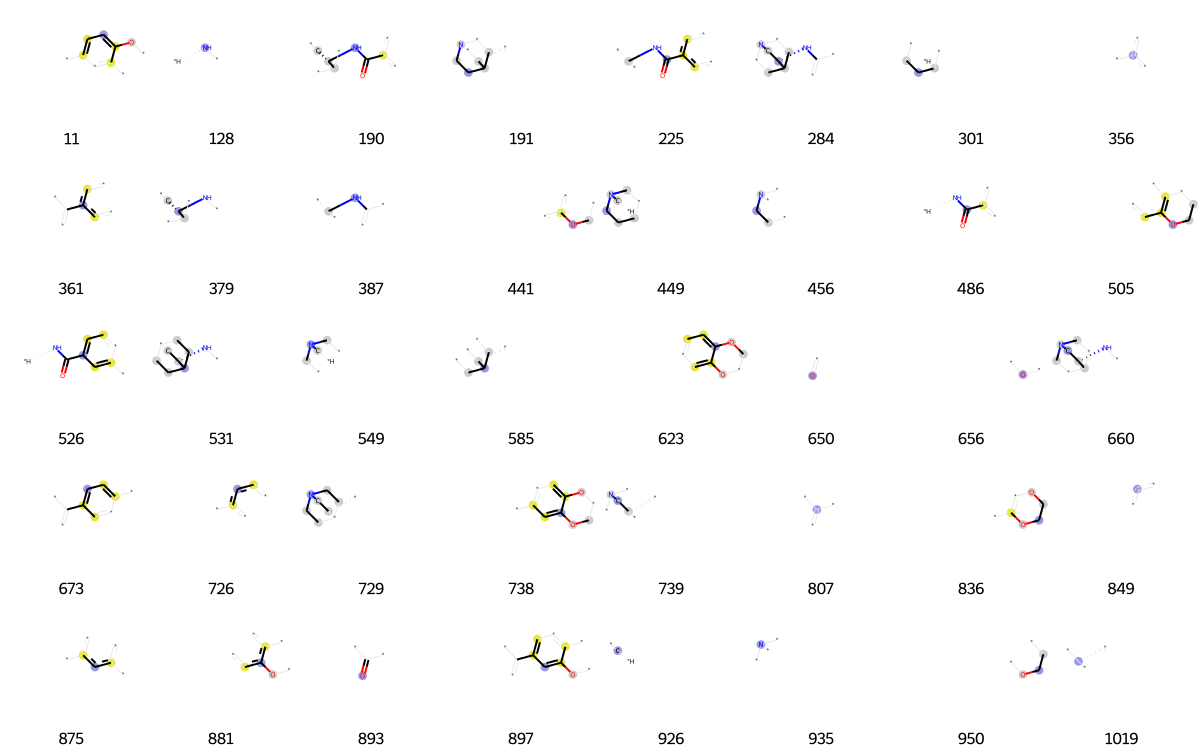

In [3549]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [3550]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[19,
 33,
 64,
 67,
 80,
 92,
 128,
 136,
 162,
 175,
 189,
 194,
 200,
 257,
 266,
 270,
 314,
 348,
 352,
 356,
 378,
 381,
 391,
 394,
 400,
 406,
 417,
 437,
 456,
 464,
 471,
 486,
 487,
 511,
 523,
 543,
 552,
 562,
 579,
 609,
 650,
 656,
 660,
 672,
 675,
 698,
 710,
 726,
 736,
 741,
 767,
 781,
 784,
 792,
 801,
 807,
 824,
 825,
 831,
 842,
 849,
 893,
 910,
 925,
 926,
 935,
 945,
 947,
 950,
 980,
 984]

In [3551]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[1,
 33,
 45,
 63,
 64,
 78,
 80,
 90,
 117,
 119,
 128,
 165,
 175,
 203,
 216,
 237,
 244,
 283,
 301,
 314,
 322,
 346,
 356,
 361,
 432,
 456,
 465,
 473,
 478,
 486,
 526,
 561,
 598,
 599,
 650,
 657,
 659,
 673,
 721,
 726,
 758,
 767,
 807,
 816,
 831,
 847,
 849,
 875,
 884,
 886,
 893,
 898,
 926,
 935,
 987,
 994,
 997,
 1019,
 1022]

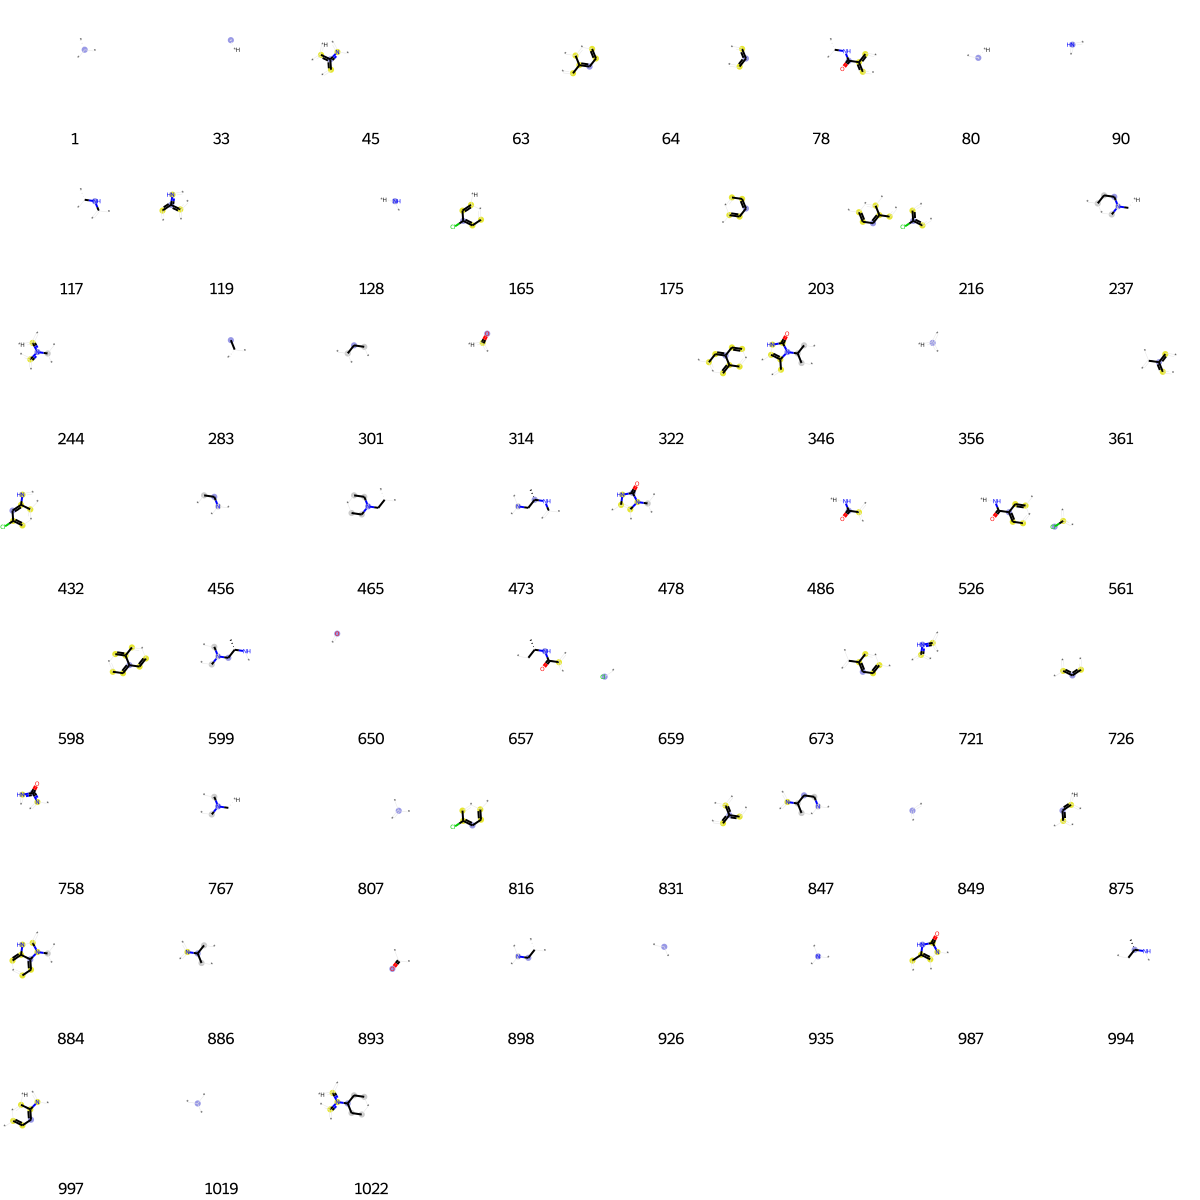

In [3552]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [3553]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[33,
 46,
 68,
 80,
 97,
 180,
 193,
 216,
 248,
 252,
 266,
 301,
 310,
 333,
 335,
 350,
 356,
 361,
 389,
 392,
 416,
 452,
 458,
 490,
 561,
 587,
 646,
 650,
 659,
 692,
 699,
 713,
 714,
 722,
 726,
 730,
 734,
 741,
 753,
 767,
 802,
 807,
 816,
 822,
 830,
 849,
 873,
 875,
 893,
 904,
 926,
 935,
 944,
 1004,
 1019]

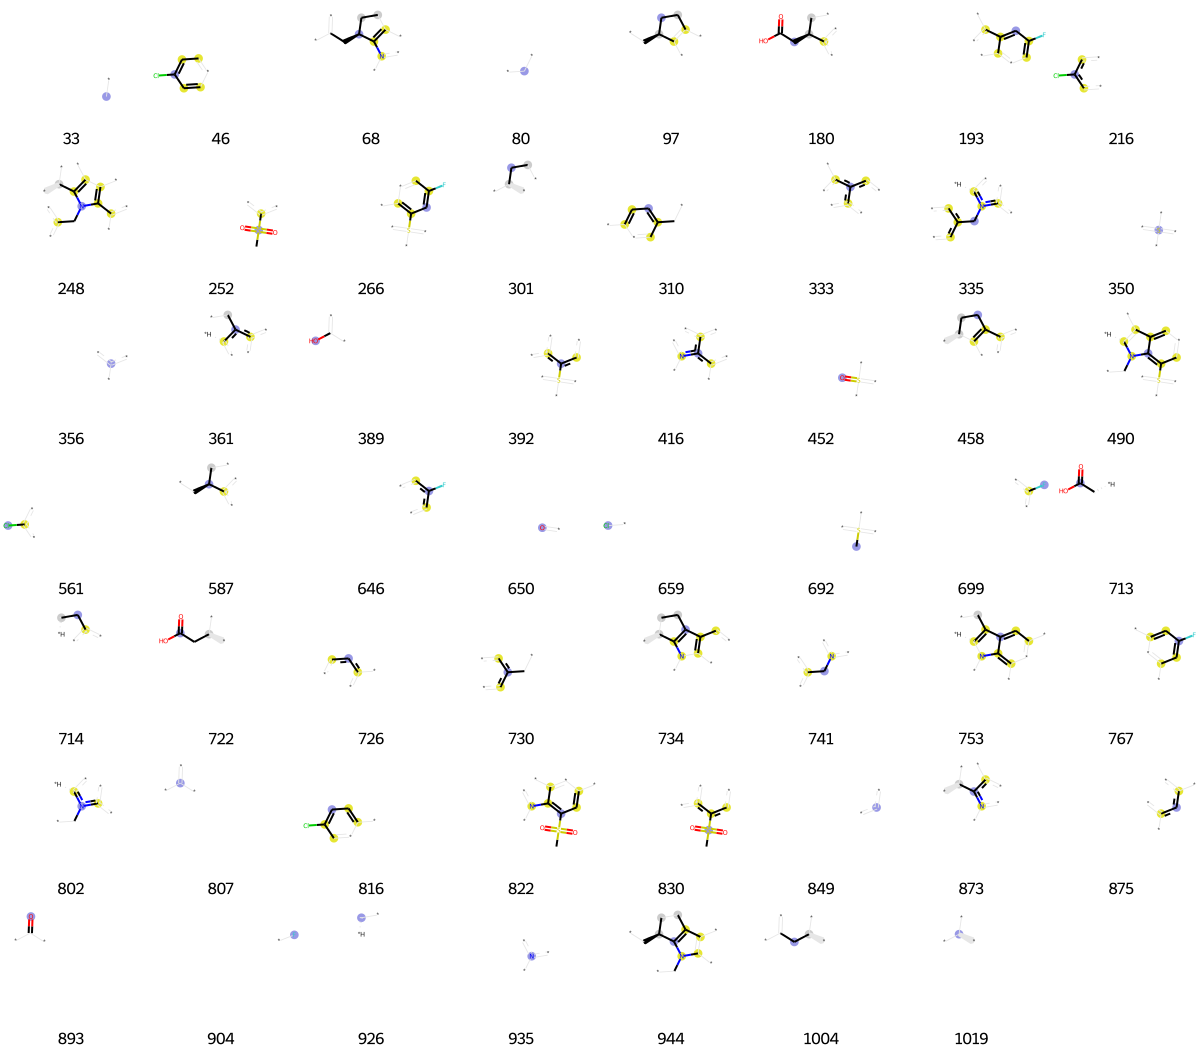

In [3554]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [3555]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[16,
 19,
 33,
 42,
 43,
 53,
 64,
 80,
 105,
 114,
 128,
 130,
 136,
 168,
 191,
 237,
 278,
 301,
 333,
 356,
 361,
 372,
 378,
 381,
 407,
 417,
 437,
 448,
 456,
 511,
 523,
 552,
 562,
 579,
 584,
 629,
 645,
 650,
 656,
 672,
 695,
 726,
 730,
 734,
 741,
 747,
 757,
 767,
 784,
 792,
 804,
 807,
 831,
 838,
 841,
 842,
 843,
 847,
 849,
 884,
 886,
 893,
 896,
 926,
 934,
 935,
 950,
 972,
 1014,
 1019]

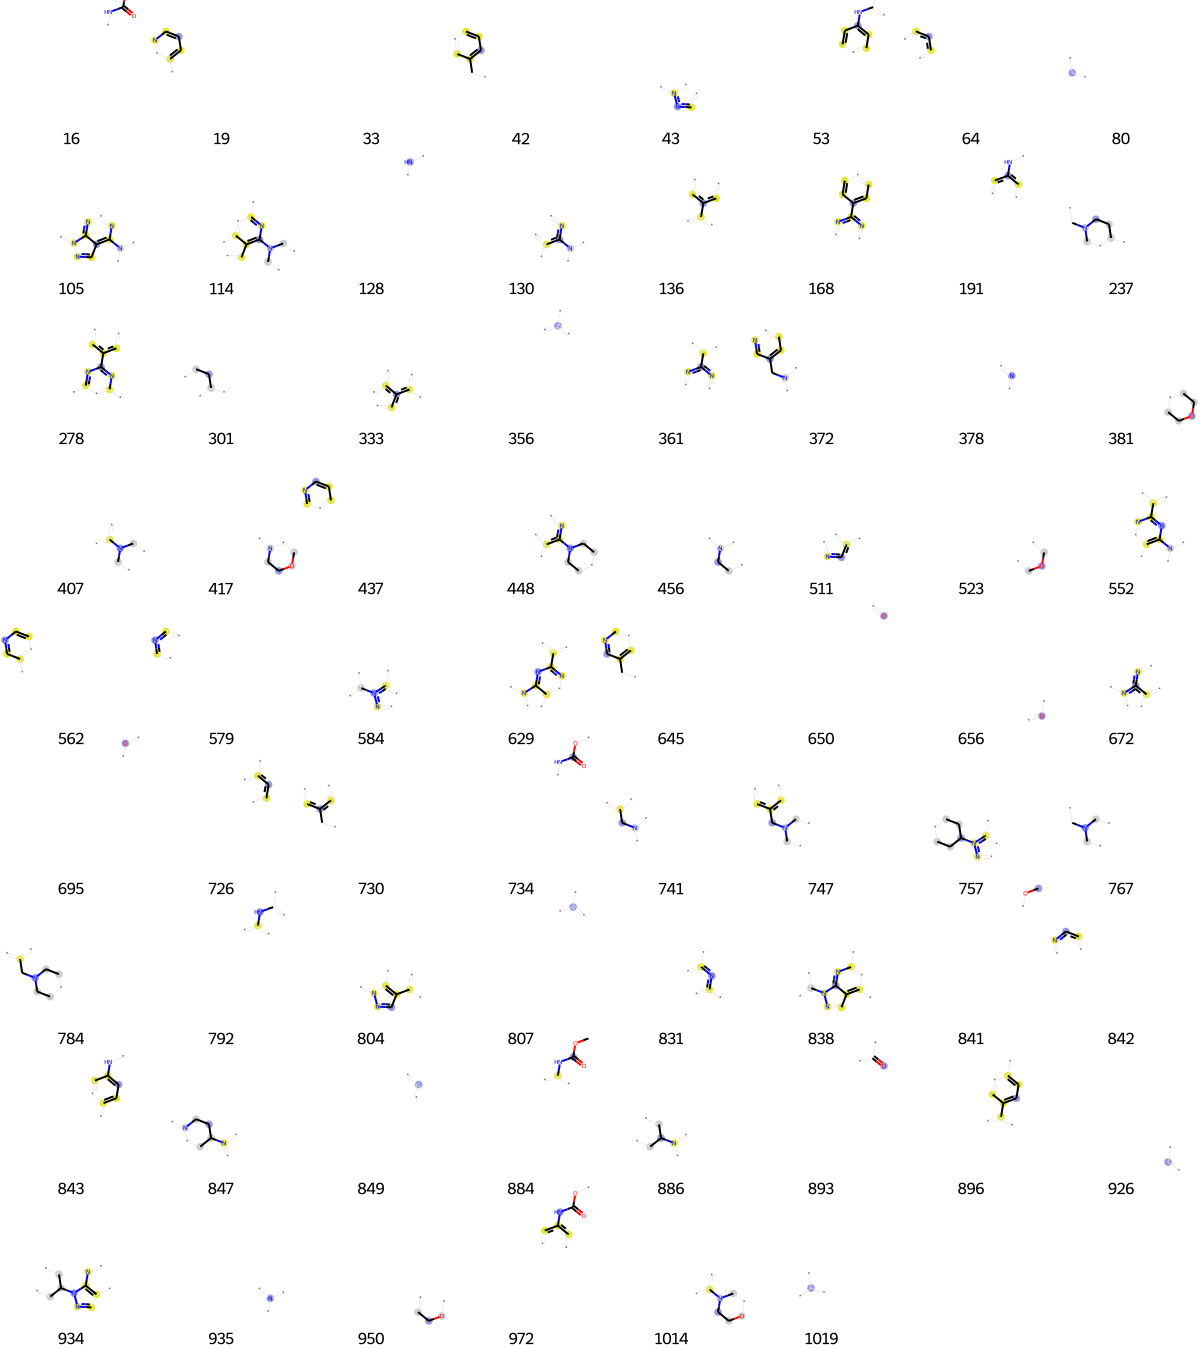

In [3556]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [3557]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[15,
 32,
 33,
 64,
 65,
 73,
 80,
 103,
 136,
 147,
 158,
 166,
 175,
 193,
 209,
 223,
 267,
 271,
 289,
 314,
 318,
 323,
 356,
 367,
 378,
 381,
 428,
 433,
 435,
 459,
 471,
 484,
 489,
 504,
 515,
 516,
 536,
 548,
 578,
 580,
 599,
 623,
 650,
 672,
 698,
 701,
 726,
 736,
 741,
 745,
 786,
 807,
 831,
 849,
 875,
 922,
 932,
 935,
 960,
 969,
 975]

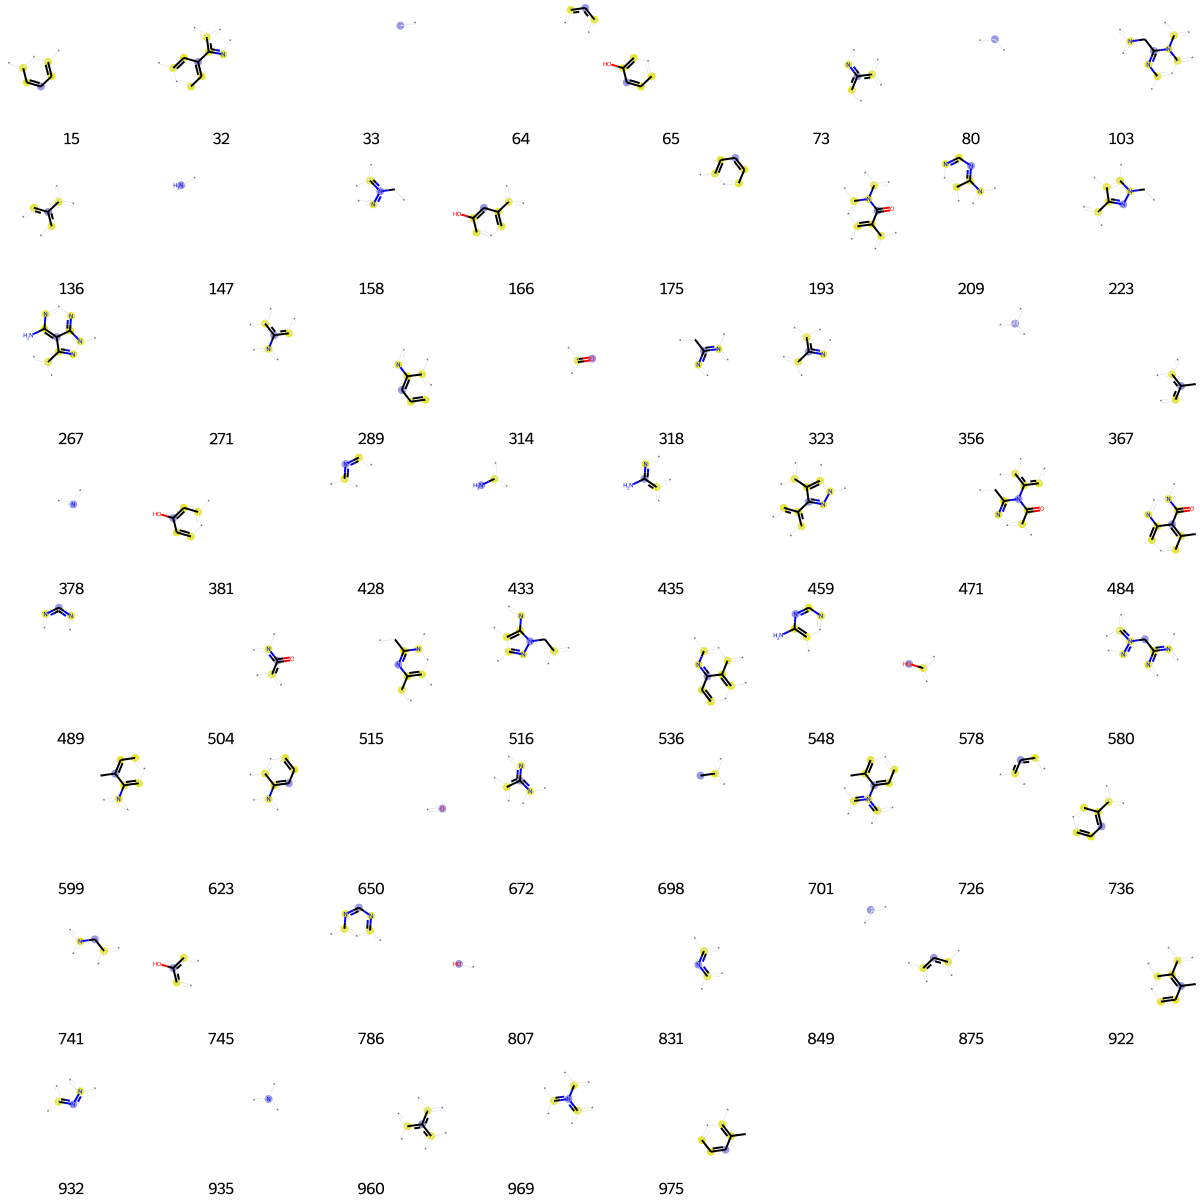

In [3558]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [3559]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[9,
 24,
 33,
 73,
 114,
 128,
 136,
 143,
 168,
 191,
 221,
 228,
 248,
 290,
 301,
 322,
 323,
 333,
 350,
 352,
 356,
 360,
 361,
 371,
 378,
 381,
 386,
 389,
 391,
 392,
 401,
 428,
 452,
 454,
 456,
 458,
 485,
 491,
 502,
 511,
 512,
 514,
 516,
 533,
 593,
 606,
 610,
 646,
 650,
 673,
 695,
 699,
 709,
 719,
 726,
 743,
 749,
 767,
 807,
 818,
 831,
 837,
 841,
 849,
 875,
 893,
 896,
 904,
 908,
 911,
 926,
 988,
 997,
 1019]

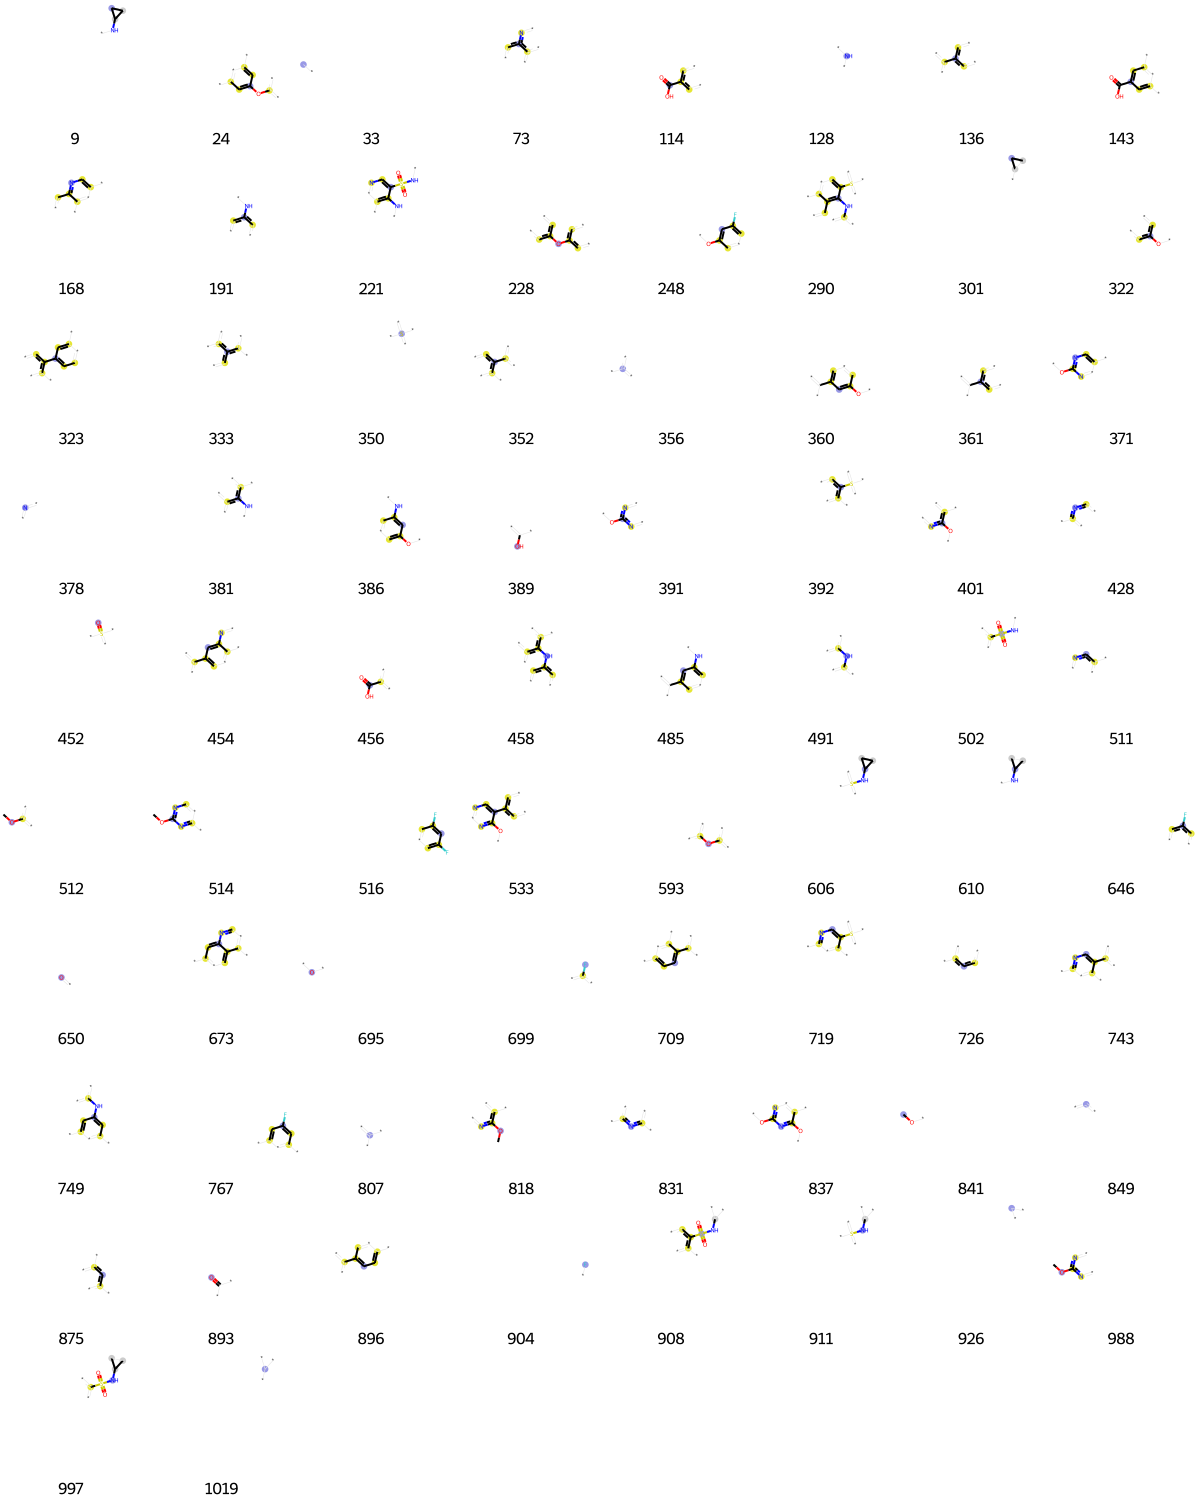

In [3560]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [3561]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[15,
 25,
 36,
 64,
 138,
 184,
 198,
 212,
 261,
 314,
 338,
 344,
 356,
 361,
 366,
 378,
 381,
 383,
 407,
 433,
 456,
 480,
 490,
 497,
 561,
 563,
 579,
 597,
 618,
 650,
 659,
 684,
 687,
 721,
 723,
 726,
 751,
 752,
 801,
 807,
 842,
 849,
 875,
 879,
 893,
 922,
 926,
 935,
 942,
 952,
 961,
 974,
 985,
 1010]

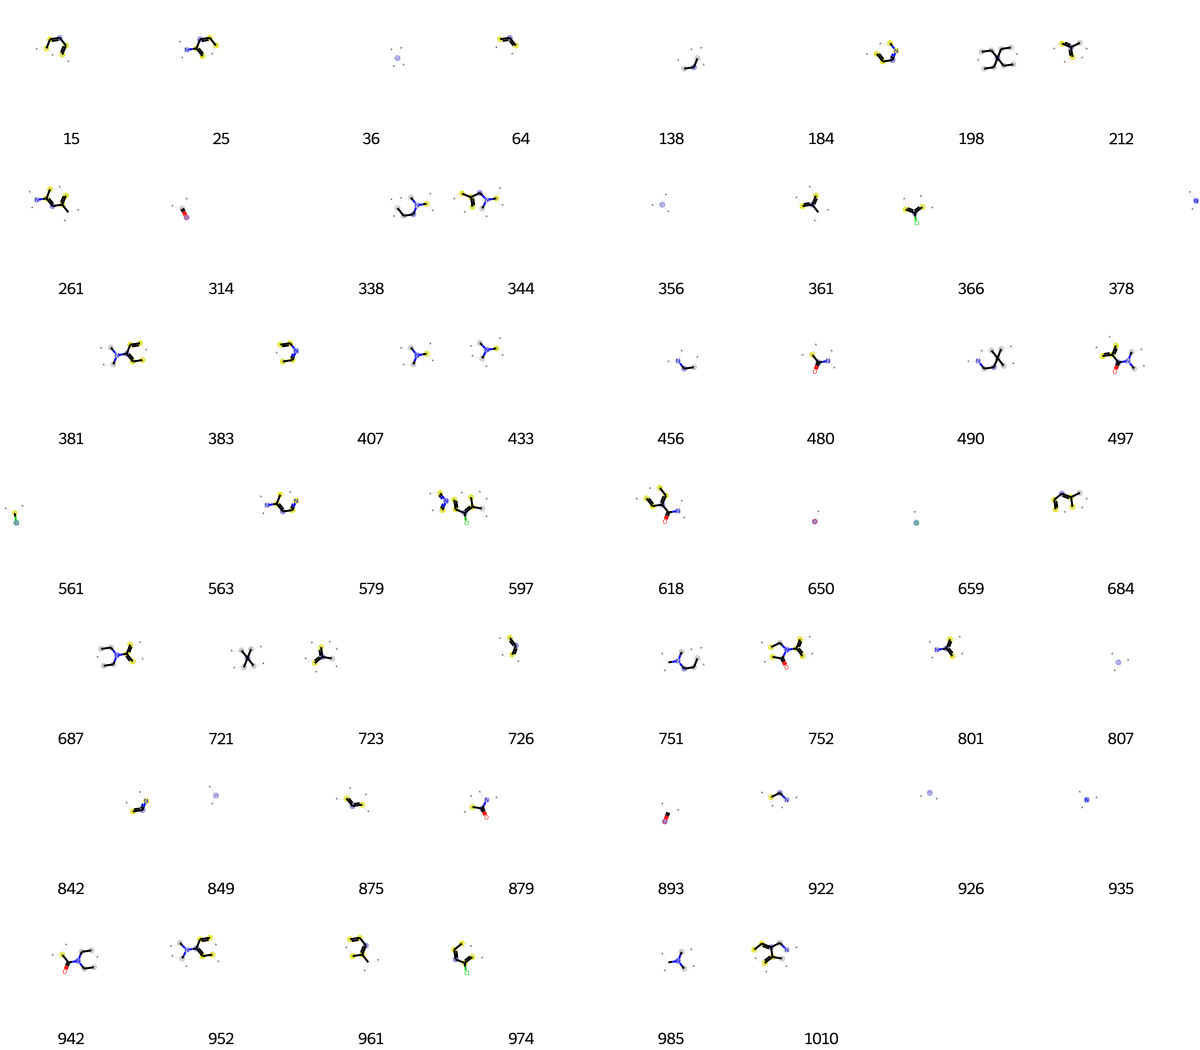

In [3562]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [3563]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[2,
 4,
 64,
 121,
 140,
 162,
 209,
 266,
 301,
 307,
 356,
 378,
 385,
 402,
 412,
 474,
 484,
 624,
 656,
 675,
 698,
 726,
 747,
 753,
 781,
 787,
 810,
 833,
 849,
 858,
 890,
 893,
 902,
 919,
 926,
 932,
 935,
 976,
 1012,
 1019]

In [3564]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[16,
 33,
 73,
 80,
 90,
 104,
 119,
 128,
 170,
 219,
 260,
 294,
 310,
 356,
 378,
 535,
 591,
 650,
 695,
 712,
 721,
 726,
 730,
 734,
 767,
 790,
 792,
 794,
 807,
 831,
 841,
 849,
 875,
 884,
 887,
 893,
 915,
 974,
 975,
 978,
 1011]

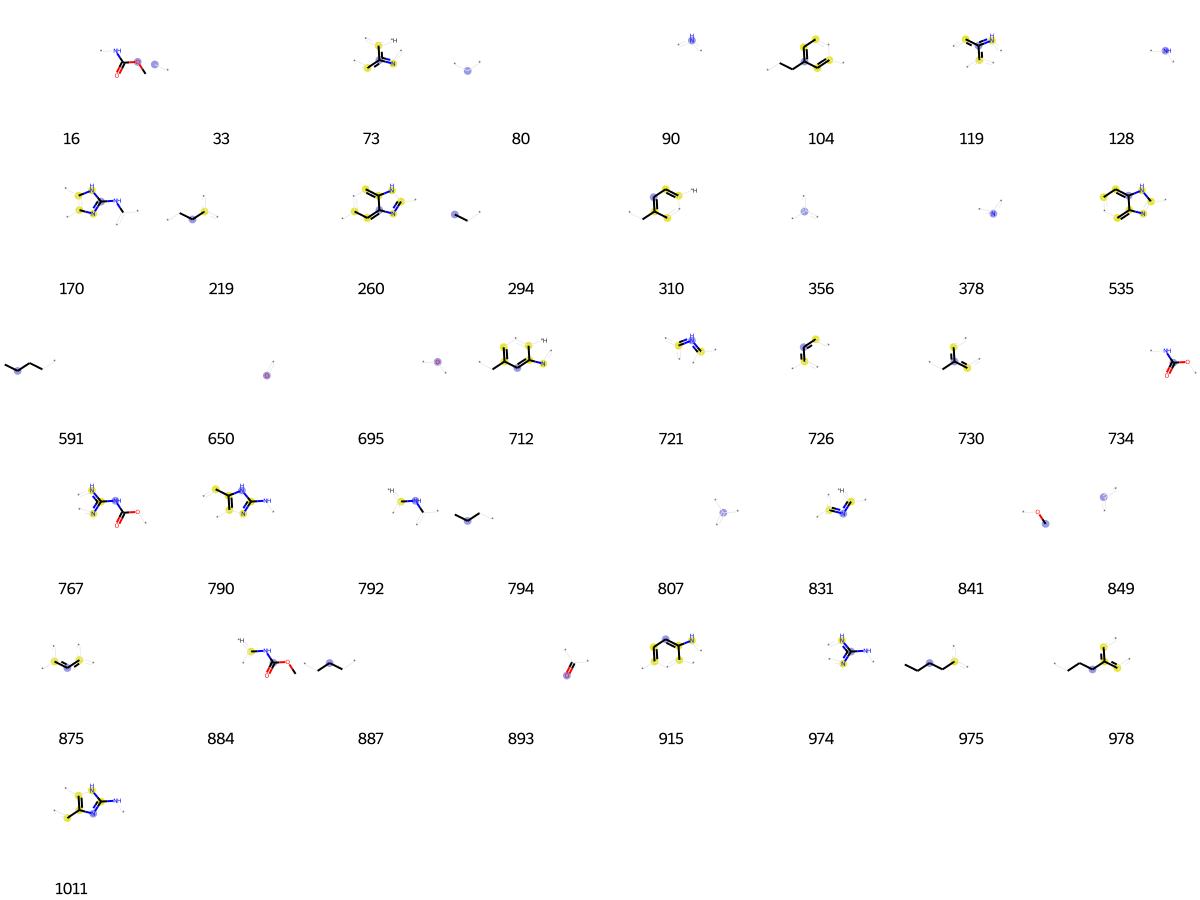

In [3565]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [3566]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[1,
 29,
 33,
 42,
 64,
 80,
 175,
 220,
 227,
 237,
 283,
 289,
 301,
 332,
 341,
 356,
 389,
 432,
 456,
 458,
 465,
 565,
 573,
 578,
 726,
 730,
 745,
 754,
 761,
 767,
 800,
 807,
 829,
 849,
 860,
 872,
 886,
 898,
 926,
 935,
 1019]

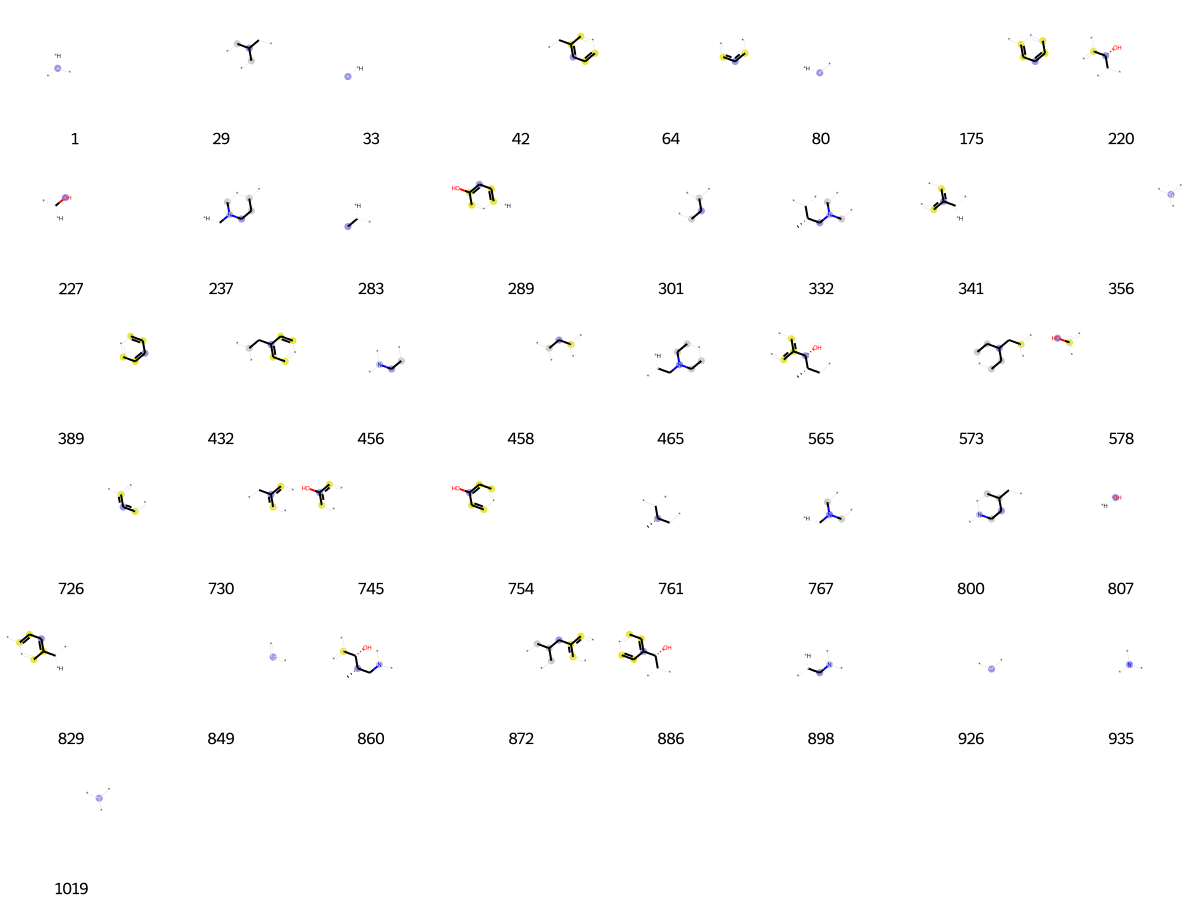

In [3567]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [3568]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[4,
 29,
 33,
 45,
 64,
 80,
 110,
 121,
 128,
 175,
 197,
 237,
 247,
 261,
 294,
 301,
 333,
 344,
 353,
 356,
 441,
 456,
 458,
 466,
 472,
 486,
 549,
 580,
 581,
 586,
 591,
 616,
 650,
 653,
 656,
 695,
 701,
 726,
 731,
 767,
 794,
 800,
 807,
 849,
 858,
 887,
 893,
 913,
 926,
 935,
 950,
 987,
 994,
 1019]

In [3569]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[4,
 62,
 77,
 80,
 147,
 222,
 257,
 314,
 353,
 356,
 378,
 424,
 433,
 485,
 492,
 498,
 541,
 577,
 606,
 639,
 650,
 656,
 675,
 689,
 726,
 804,
 807,
 821,
 822,
 831,
 849,
 863,
 897,
 899,
 926,
 935,
 998,
 1018,
 1019]

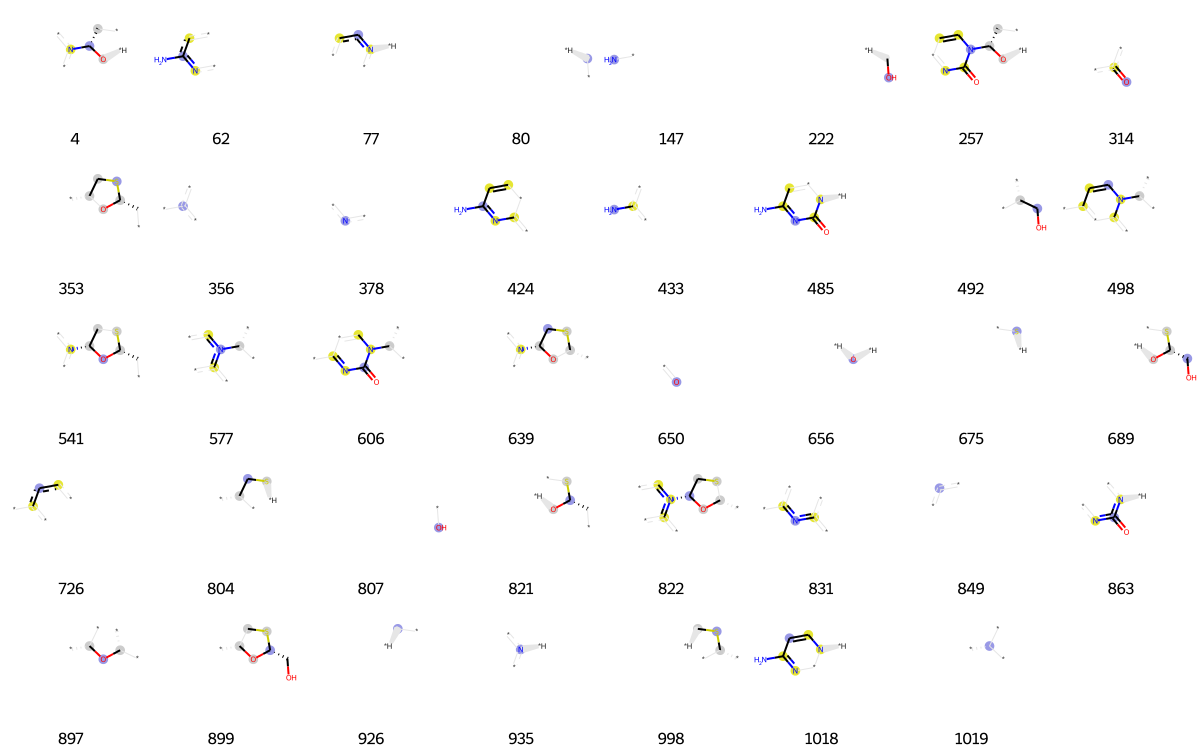

In [3570]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [3571]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[15,
 58,
 64,
 80,
 119,
 128,
 134,
 147,
 199,
 288,
 303,
 333,
 350,
 356,
 366,
 392,
 452,
 475,
 493,
 502,
 549,
 561,
 592,
 602,
 650,
 659,
 667,
 726,
 732,
 816,
 849,
 862,
 887,
 974,
 981,
 992]

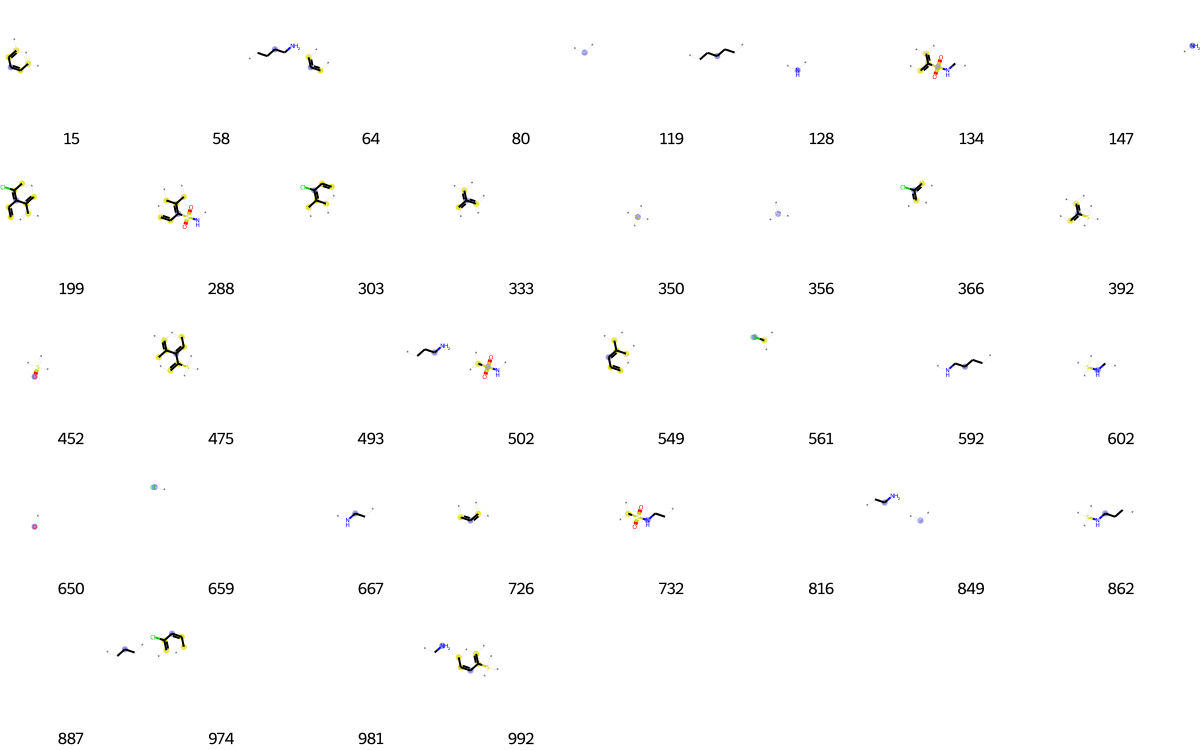

In [3572]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [3573]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[0,
 1,
 33,
 41,
 64,
 80,
 102,
 119,
 147,
 175,
 221,
 222,
 268,
 278,
 283,
 301,
 341,
 356,
 381,
 389,
 396,
 423,
 482,
 498,
 557,
 575,
 601,
 643,
 650,
 658,
 695,
 721,
 726,
 762,
 778,
 780,
 790,
 803,
 807,
 849,
 854,
 893,
 926,
 1019]

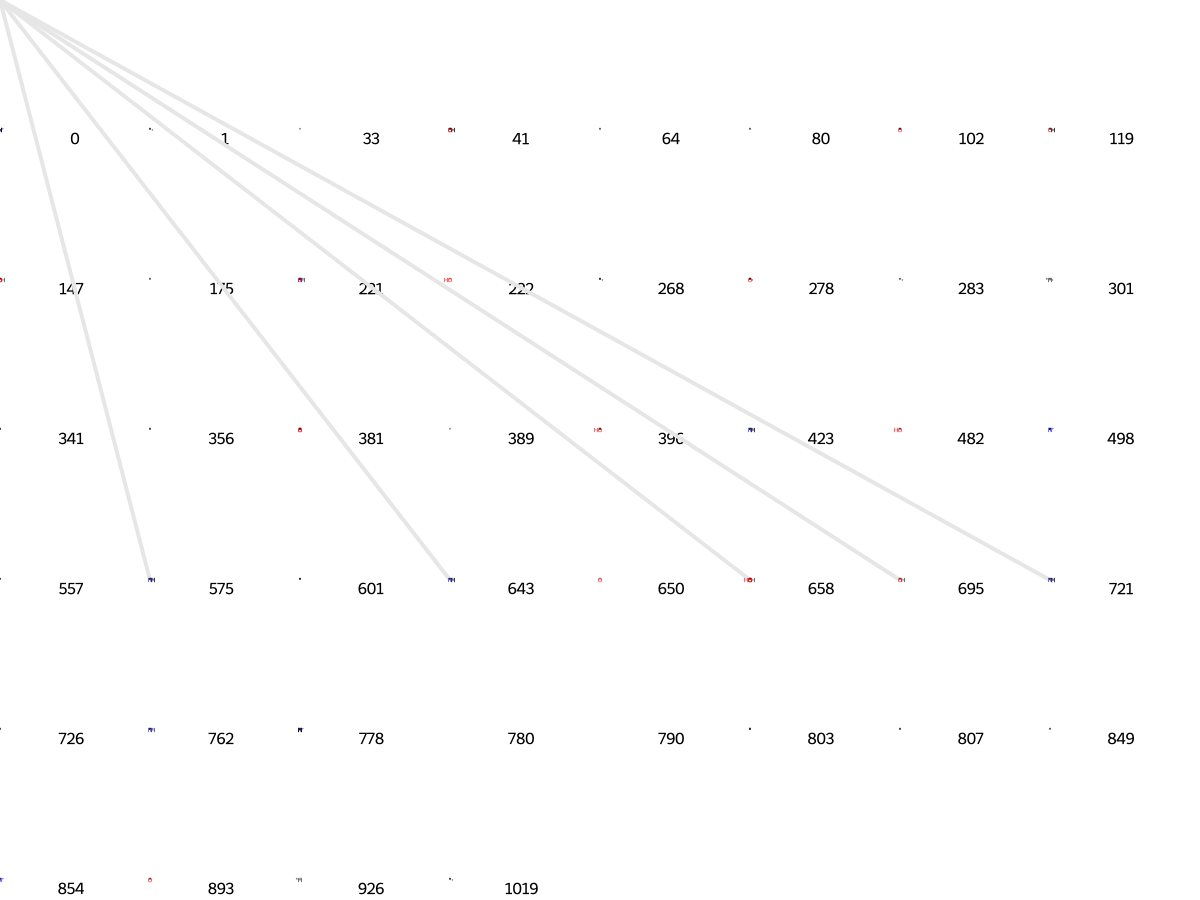

In [3574]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [3575]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[15,
 16,
 33,
 64,
 80,
 121,
 214,
 237,
 268,
 294,
 314,
 356,
 386,
 400,
 425,
 428,
 497,
 527,
 564,
 637,
 650,
 684,
 695,
 698,
 726,
 742,
 849,
 920,
 935,
 946,
 960]

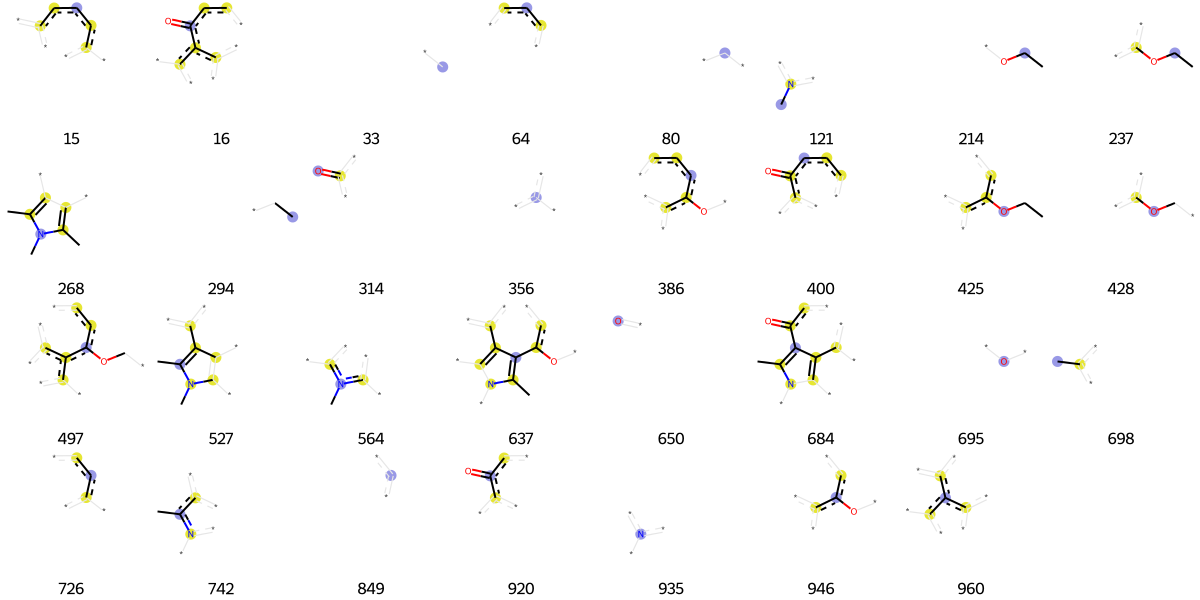

In [3576]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [3577]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[1,
 28,
 33,
 41,
 53,
 80,
 102,
 118,
 128,
 178,
 191,
 214,
 227,
 294,
 322,
 348,
 356,
 358,
 362,
 370,
 421,
 428,
 471,
 540,
 640,
 650,
 658,
 695,
 718,
 726,
 763,
 766,
 792,
 807,
 843,
 849,
 870,
 892,
 893,
 901,
 968,
 1014]

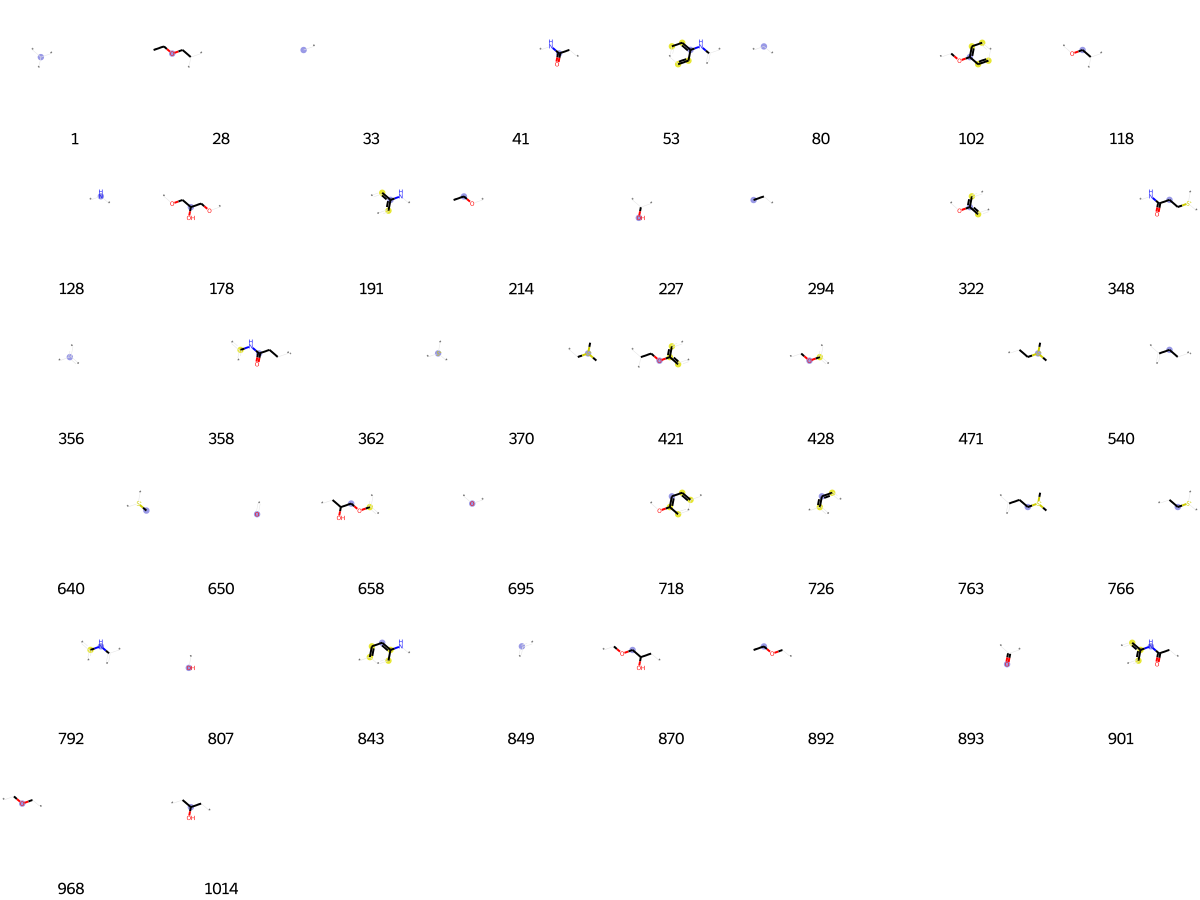

In [3578]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [3579]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[4,
 17,
 64,
 134,
 175,
 233,
 255,
 301,
 356,
 364,
 389,
 456,
 524,
 581,
 593,
 639,
 665,
 726,
 797,
 802,
 807,
 830,
 849,
 890,
 926,
 935,
 976,
 1019]

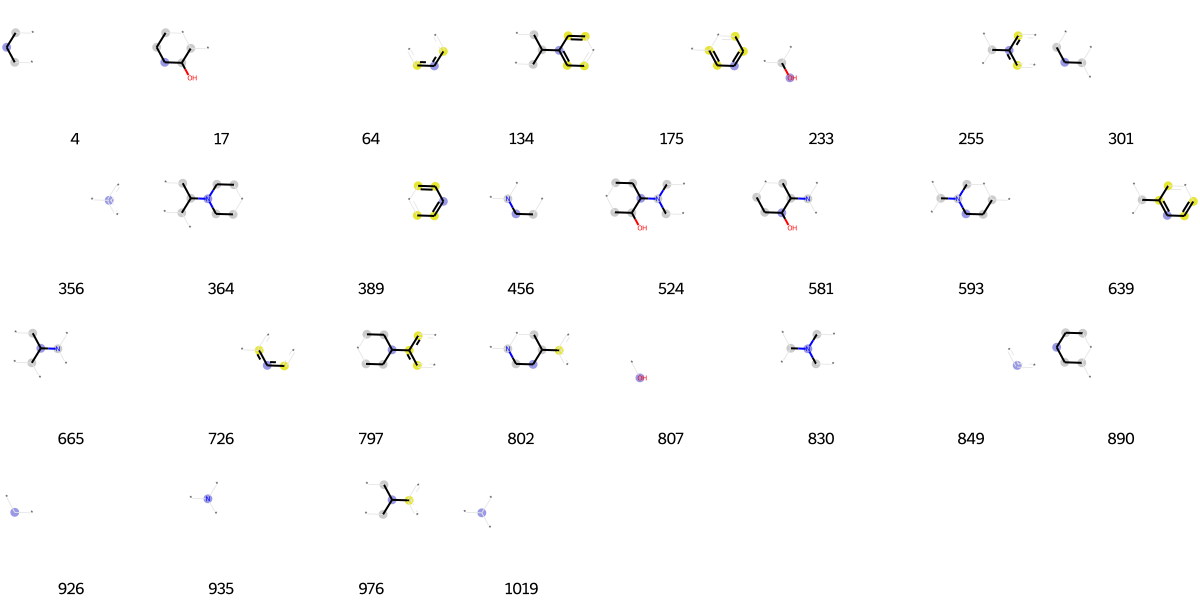

In [3580]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [3581]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[33,
 80,
 90,
 119,
 139,
 213,
 219,
 254,
 264,
 273,
 290,
 301,
 310,
 314,
 325,
 328,
 333,
 356,
 364,
 370,
 441,
 458,
 476,
 515,
 568,
 575,
 650,
 651,
 652,
 656,
 693,
 709,
 726,
 728,
 730,
 756,
 806,
 849,
 855,
 875,
 881,
 899,
 913,
 915,
 926,
 927,
 1019]

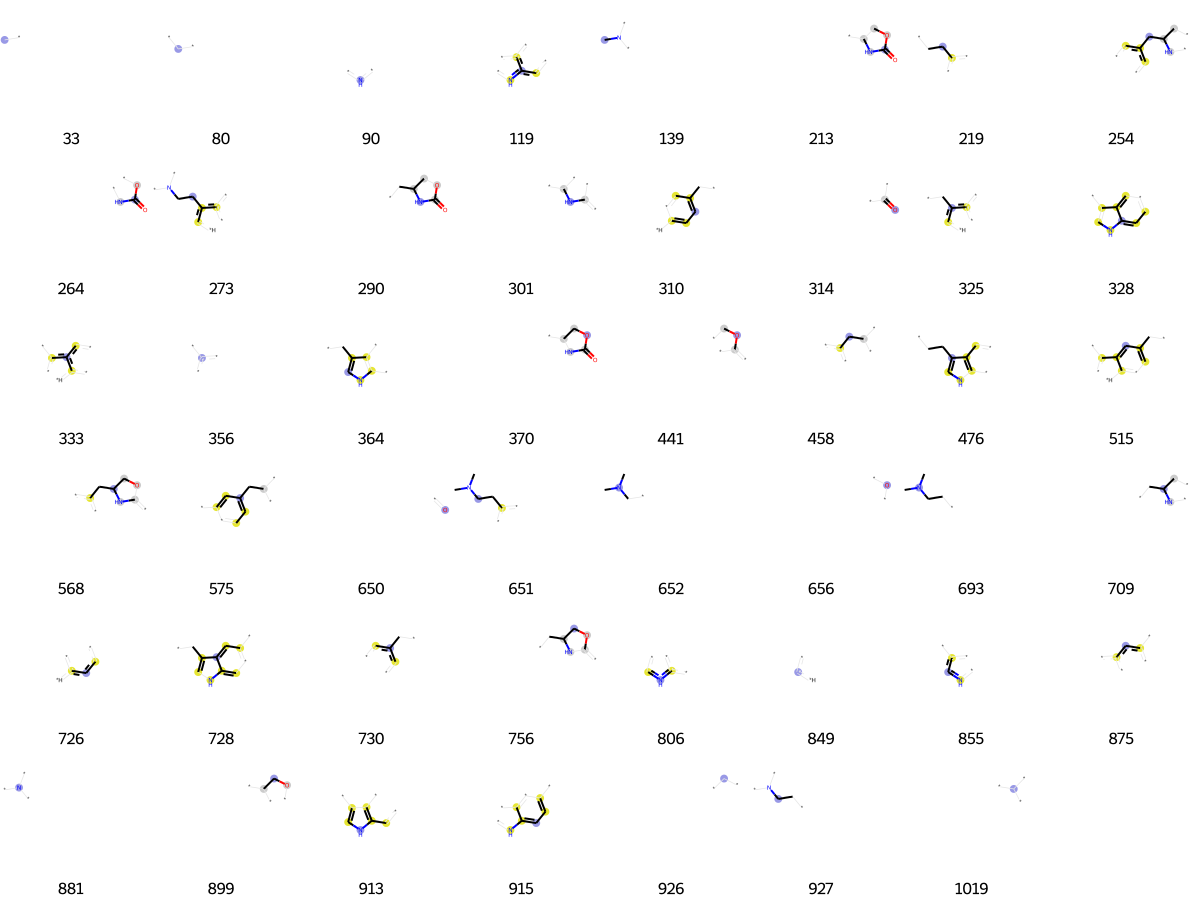

In [3582]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [3583]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[0,
 33,
 42,
 64,
 80,
 121,
 123,
 139,
 170,
 175,
 212,
 234,
 235,
 283,
 310,
 314,
 318,
 335,
 356,
 378,
 389,
 400,
 416,
 420,
 501,
 504,
 507,
 564,
 646,
 650,
 659,
 670,
 672,
 698,
 726,
 730,
 741,
 771,
 799,
 802,
 809,
 831,
 845,
 849,
 855,
 881,
 896,
 935]

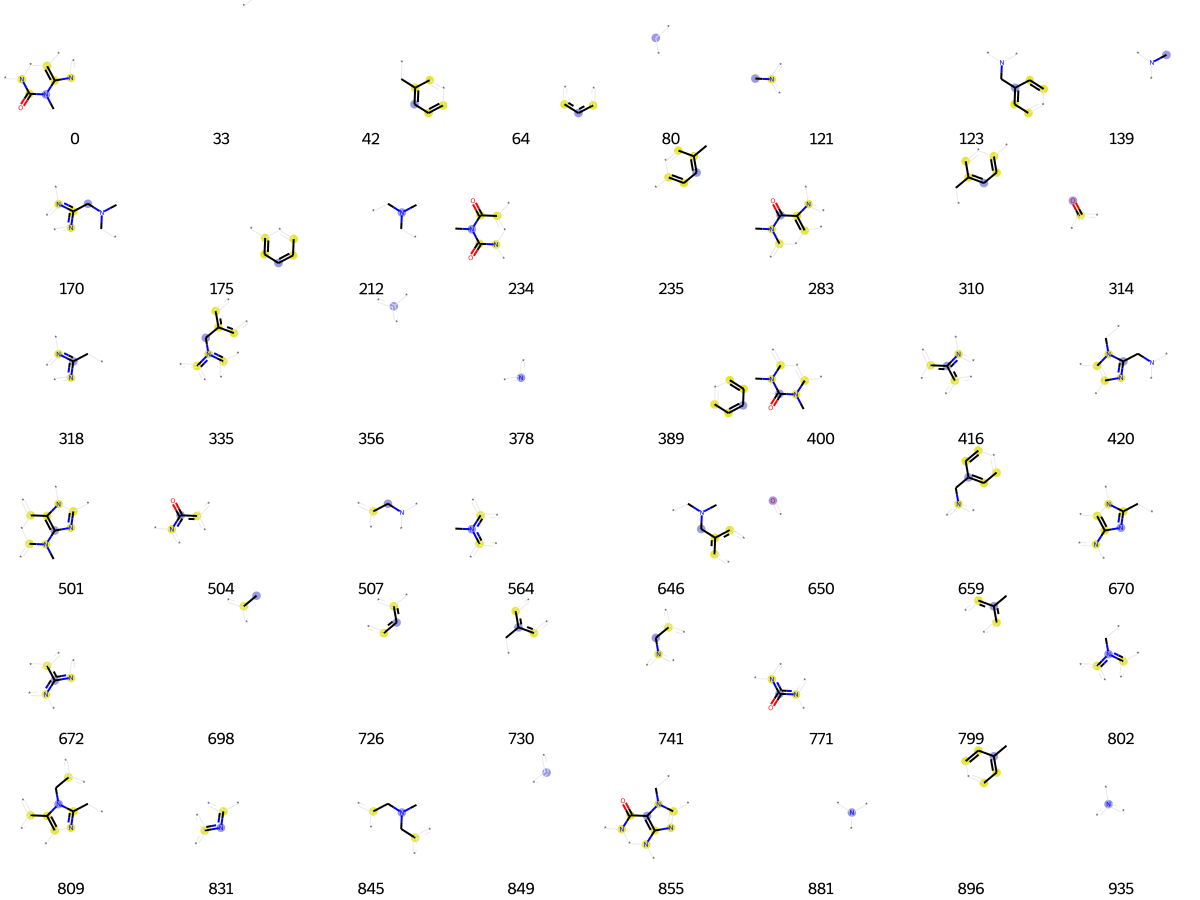

In [3584]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [3585]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[19,
 33,
 45,
 80,
 90,
 92,
 121,
 123,
 139,
 145,
 235,
 242,
 284,
 285,
 310,
 328,
 333,
 336,
 356,
 366,
 385,
 386,
 464,
 477,
 480,
 511,
 530,
 561,
 563,
 570,
 629,
 635,
 646,
 647,
 650,
 659,
 699,
 726,
 730,
 734,
 739,
 741,
 742,
 762,
 770,
 789,
 807,
 849,
 860,
 875,
 881,
 893,
 904,
 926,
 935,
 967,
 998,
 1019]

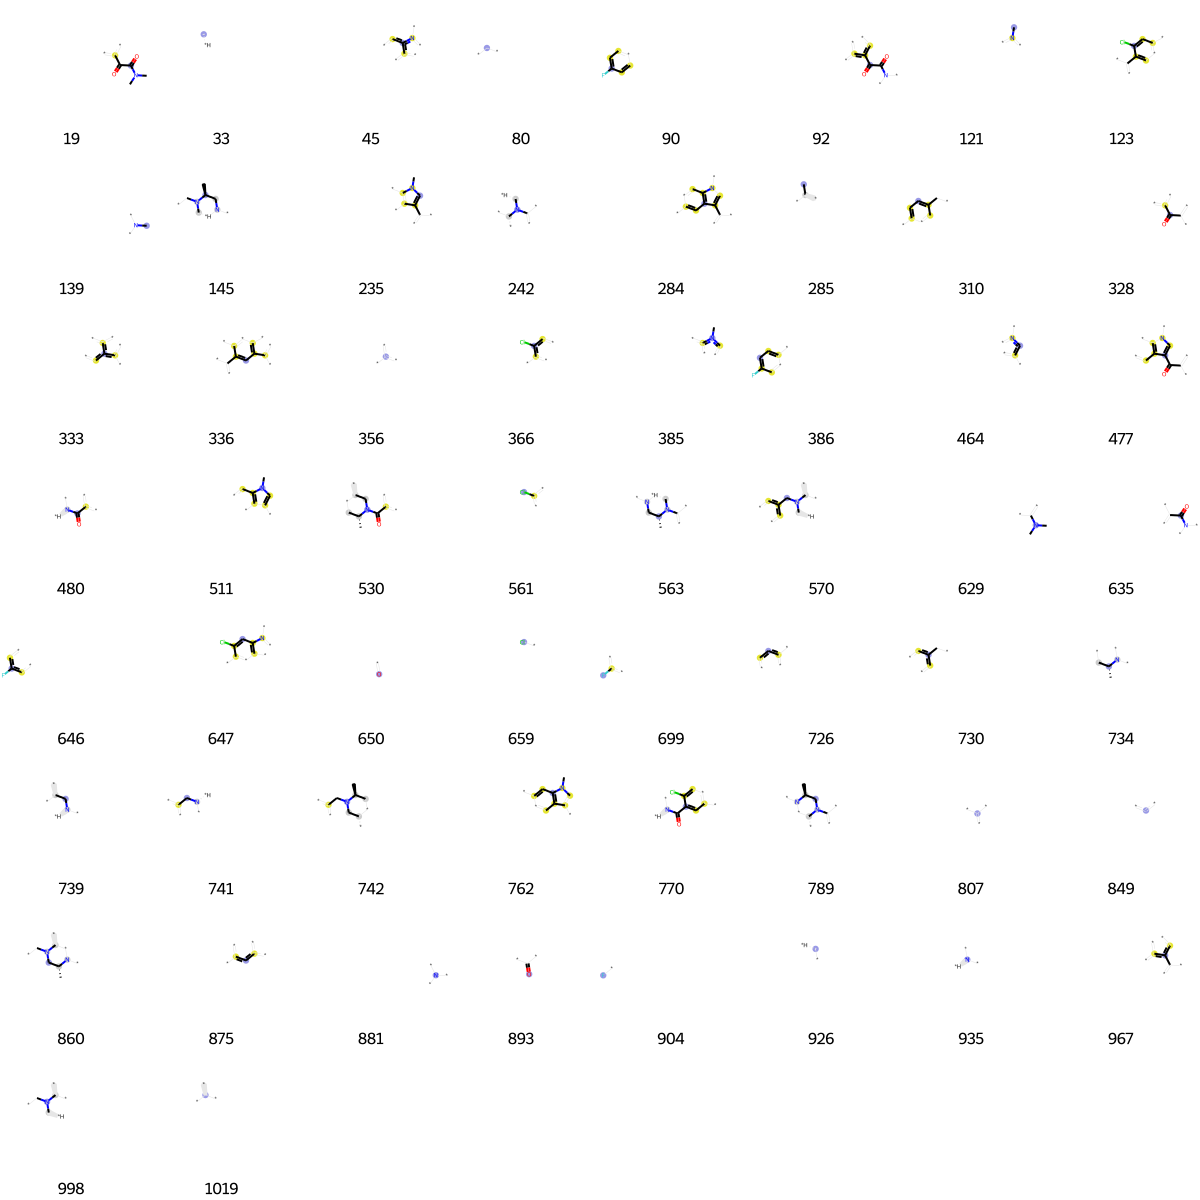

In [3586]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [3587]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[4,
 33,
 50,
 180,
 252,
 266,
 305,
 314,
 333,
 350,
 356,
 361,
 367,
 377,
 406,
 417,
 444,
 465,
 478,
 580,
 650,
 656,
 698,
 714,
 722,
 784,
 801,
 835,
 849,
 875,
 892,
 926]

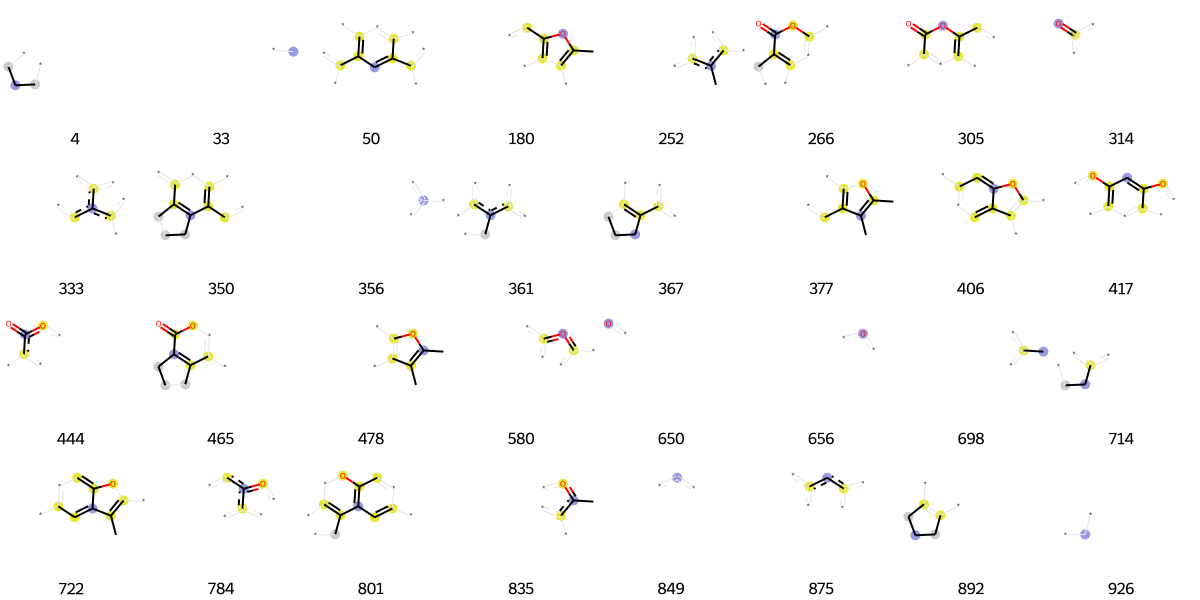

In [3588]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [3589]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[38,
 53,
 56,
 64,
 128,
 175,
 191,
 249,
 252,
 260,
 281,
 356,
 378,
 389,
 451,
 511,
 514,
 650,
 675,
 703,
 726,
 773,
 792,
 807,
 848,
 849,
 893,
 961,
 965,
 966]

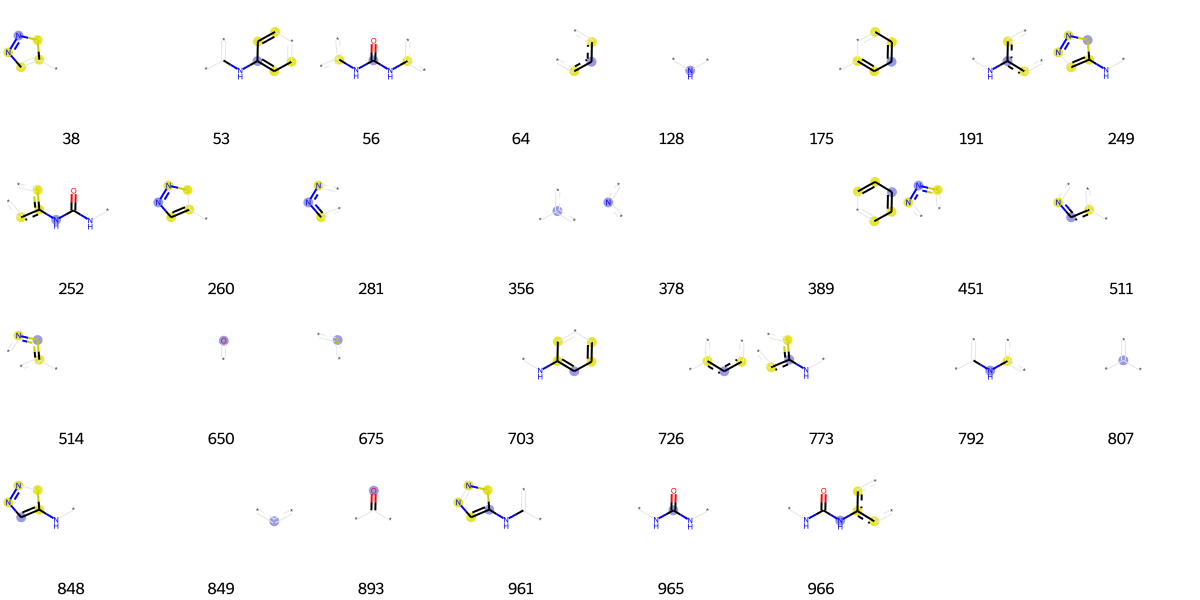

In [3590]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [3591]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[3,
 33,
 90,
 119,
 121,
 207,
 212,
 289,
 297,
 301,
 328,
 333,
 356,
 381,
 387,
 456,
 558,
 578,
 726,
 745,
 802,
 806,
 807,
 849,
 855,
 875,
 913,
 915,
 924,
 926,
 934,
 935,
 976,
 993,
 1019]

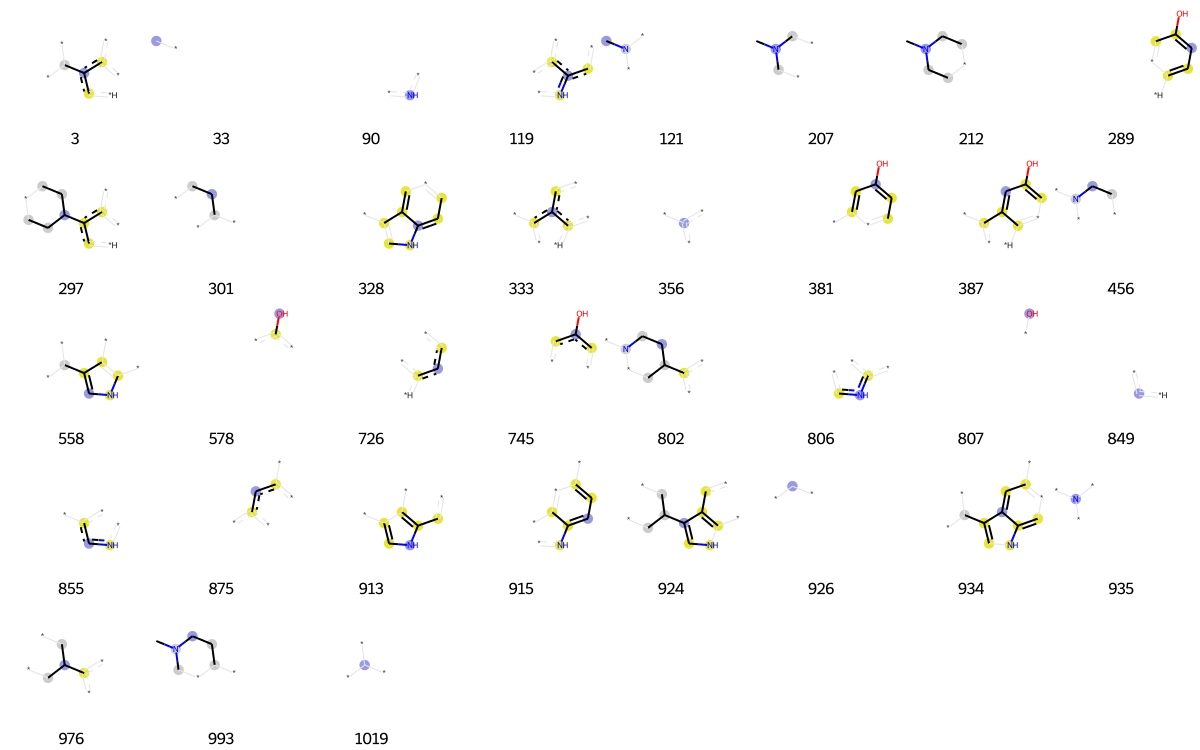

In [3592]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [3593]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[1,
 5,
 26,
 33,
 36,
 69,
 80,
 102,
 116,
 121,
 130,
 138,
 141,
 161,
 185,
 203,
 233,
 249,
 250,
 268,
 269,
 285,
 301,
 314,
 338,
 342,
 348,
 356,
 362,
 370,
 378,
 388,
 418,
 491,
 549,
 550,
 552,
 559,
 563,
 618,
 621,
 650,
 679,
 694,
 695,
 698,
 714,
 735,
 807,
 838,
 857,
 876,
 886,
 893,
 926,
 935,
 936,
 982,
 986,
 1002,
 1004,
 1014,
 1019]

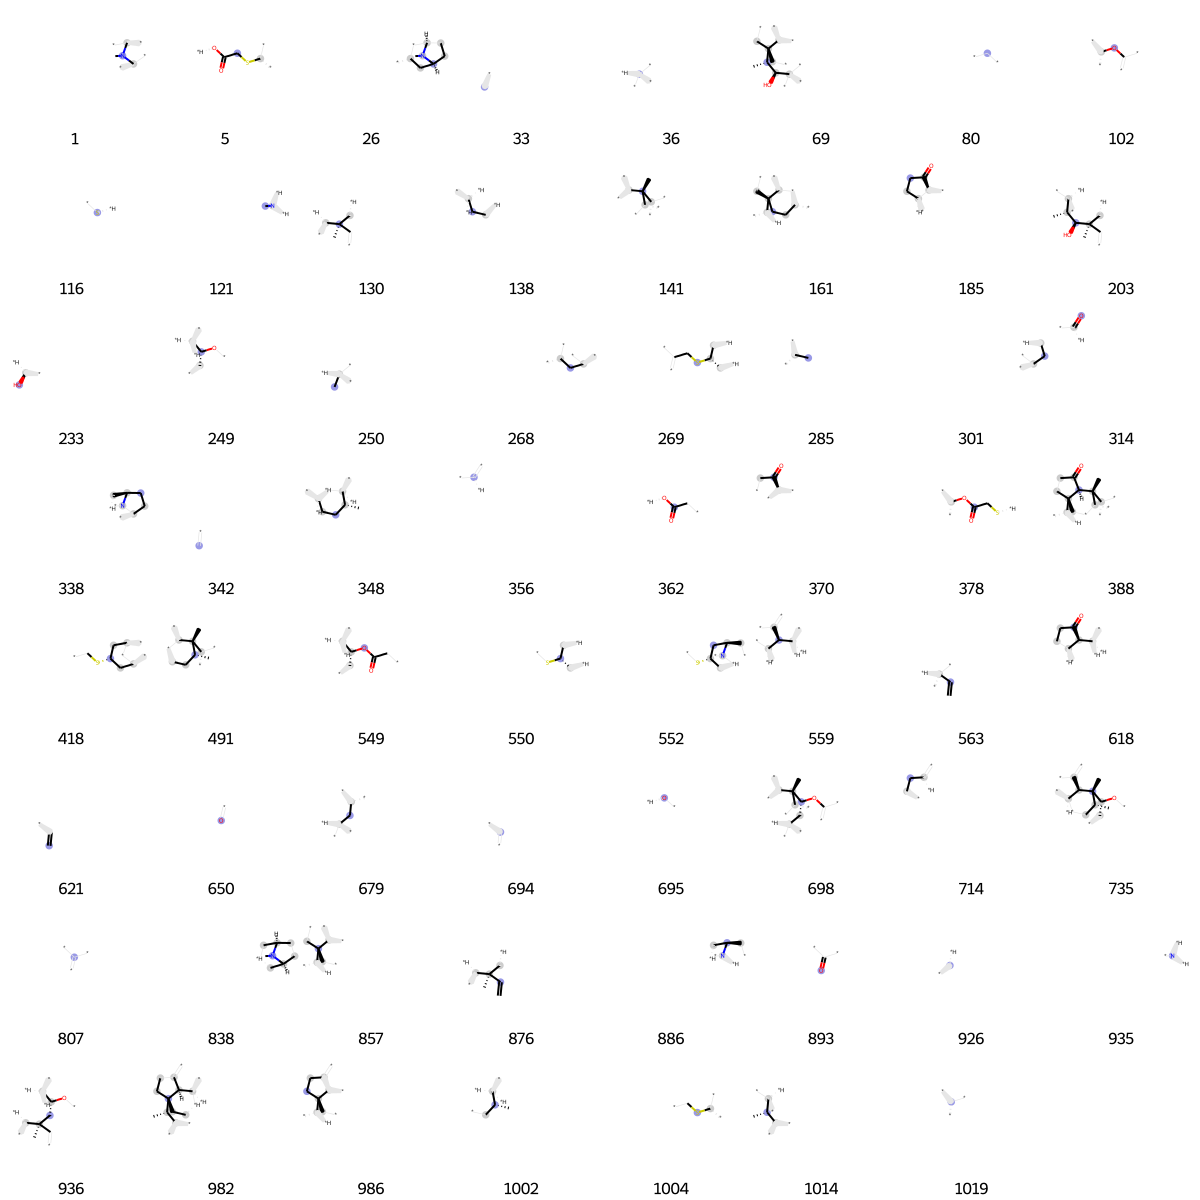

In [3594]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [3595]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[36,
 64,
 75,
 80,
 97,
 101,
 110,
 128,
 129,
 131,
 133,
 154,
 172,
 175,
 196,
 197,
 219,
 288,
 320,
 356,
 378,
 412,
 428,
 448,
 511,
 607,
 667,
 724,
 726,
 728,
 730,
 792,
 807,
 828,
 842,
 849,
 860,
 909,
 966,
 967]

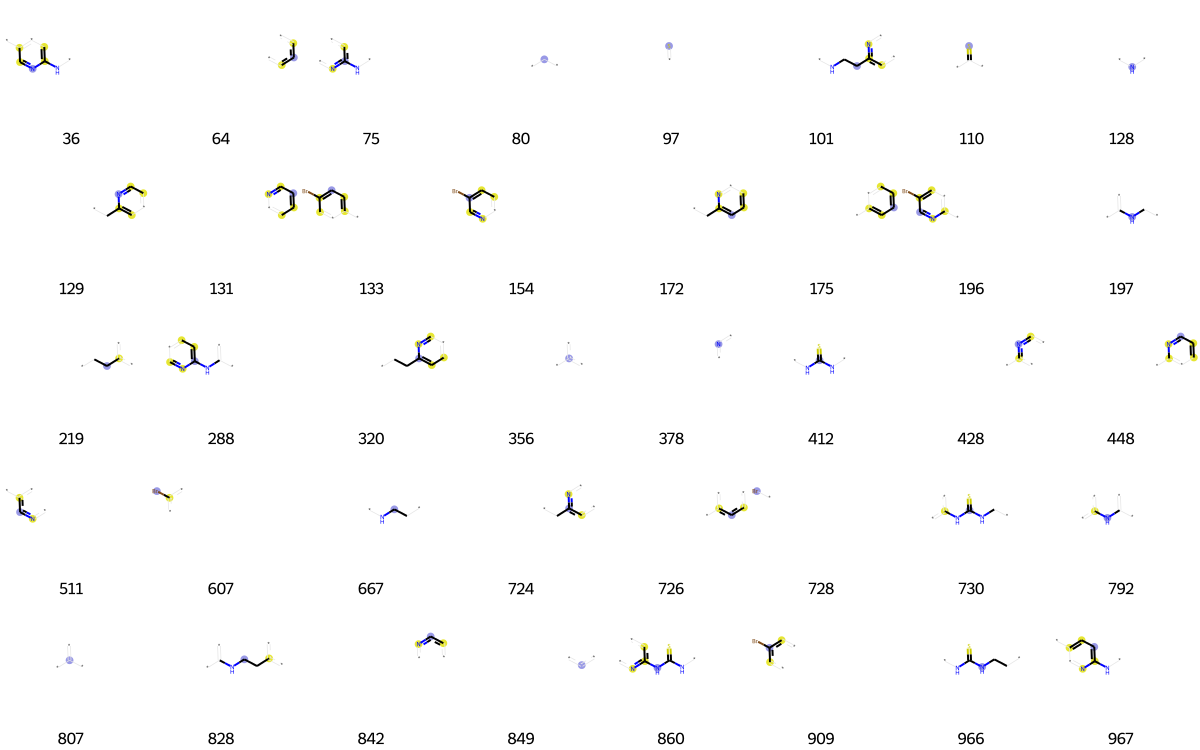

In [3596]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [3597]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[20,
 26,
 33,
 36,
 57,
 67,
 84,
 109,
 130,
 138,
 144,
 233,
 250,
 268,
 301,
 313,
 314,
 324,
 336,
 356,
 412,
 426,
 441,
 449,
 453,
 493,
 500,
 519,
 528,
 529,
 555,
 562,
 590,
 609,
 650,
 656,
 682,
 699,
 775,
 776,
 805,
 807,
 811,
 849,
 926,
 927,
 956,
 1008,
 1019]

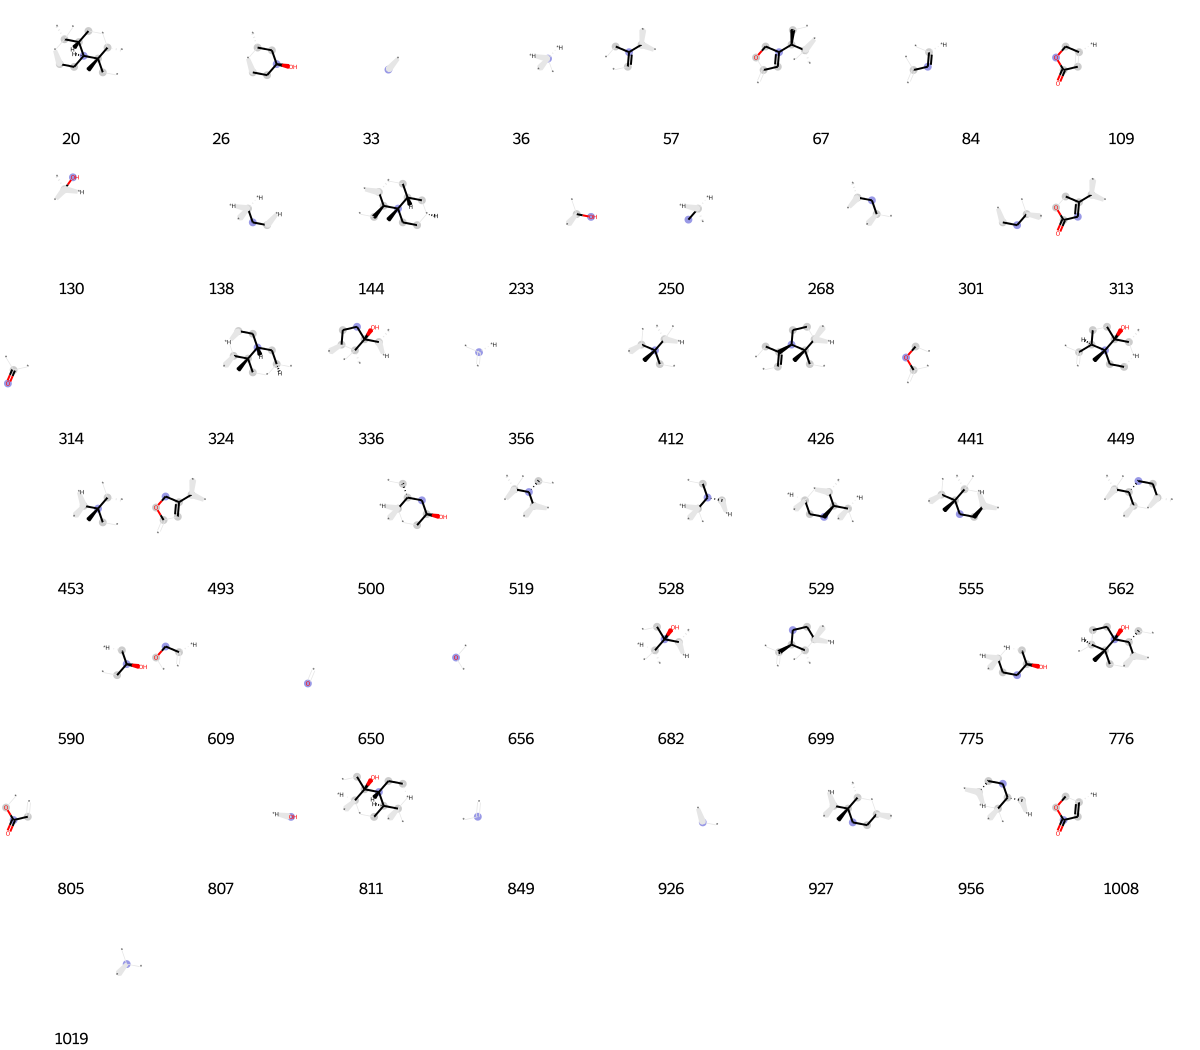

In [3598]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [3599]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[4,
 18,
 33,
 72,
 76,
 80,
 90,
 114,
 116,
 123,
 134,
 136,
 174,
 214,
 236,
 251,
 259,
 288,
 294,
 310,
 314,
 341,
 356,
 361,
 367,
 378,
 383,
 386,
 393,
 398,
 407,
 415,
 418,
 429,
 463,
 507,
 515,
 587,
 605,
 620,
 623,
 631,
 641,
 646,
 650,
 699,
 714,
 726,
 730,
 738,
 747,
 762,
 802,
 807,
 809,
 831,
 849,
 881,
 890,
 892,
 893,
 896,
 904,
 926,
 927,
 932,
 935,
 940,
 957,
 978]

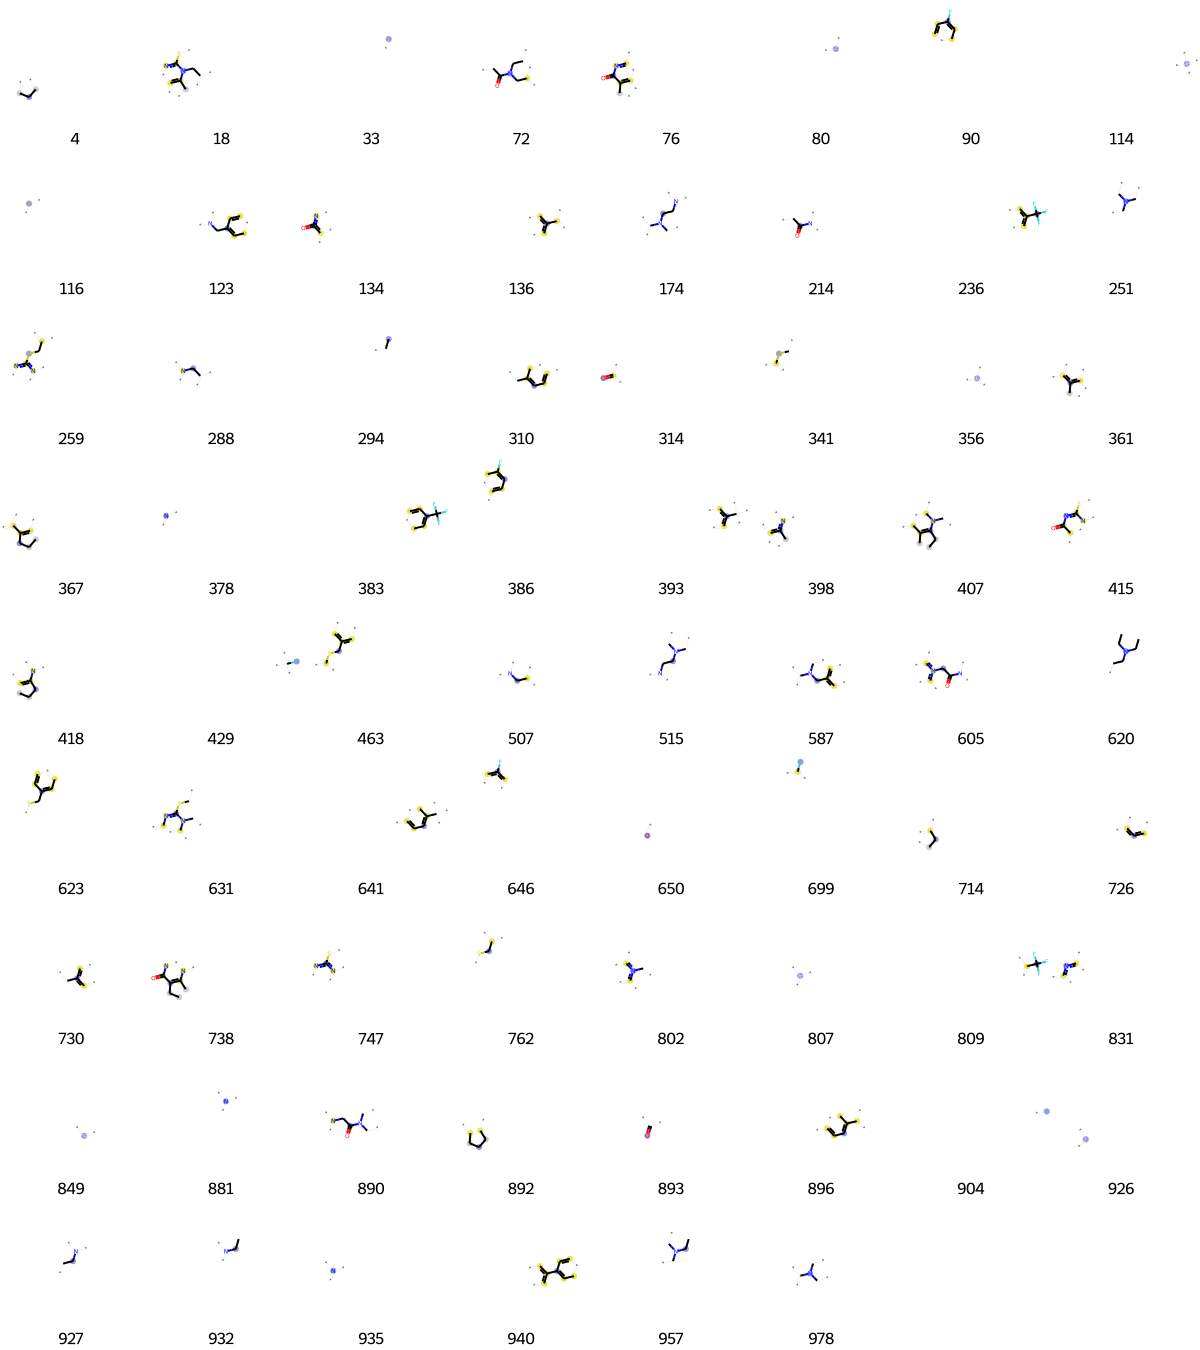

In [3600]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [3601]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[36,
 64,
 76,
 165,
 175,
 258,
 289,
 314,
 352,
 356,
 436,
 466,
 484,
 556,
 578,
 650,
 656,
 726,
 745,
 754,
 807,
 837,
 849,
 936,
 940,
 956,
 972,
 984]

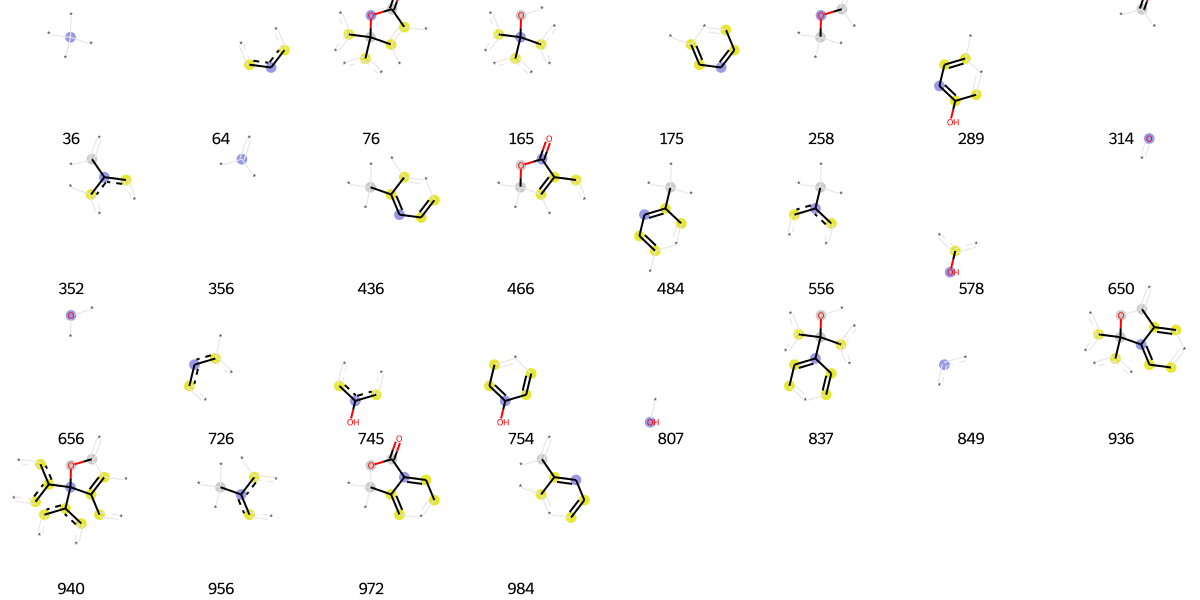

In [3602]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [3603]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[4,
 14,
 58,
 64,
 75,
 80,
 121,
 123,
 128,
 140,
 175,
 212,
 219,
 242,
 246,
 264,
 323,
 352,
 354,
 356,
 378,
 381,
 392,
 417,
 456,
 458,
 523,
 532,
 536,
 556,
 656,
 667,
 684,
 714,
 726,
 767,
 825,
 849,
 875,
 892,
 926,
 935,
 950,
 984]

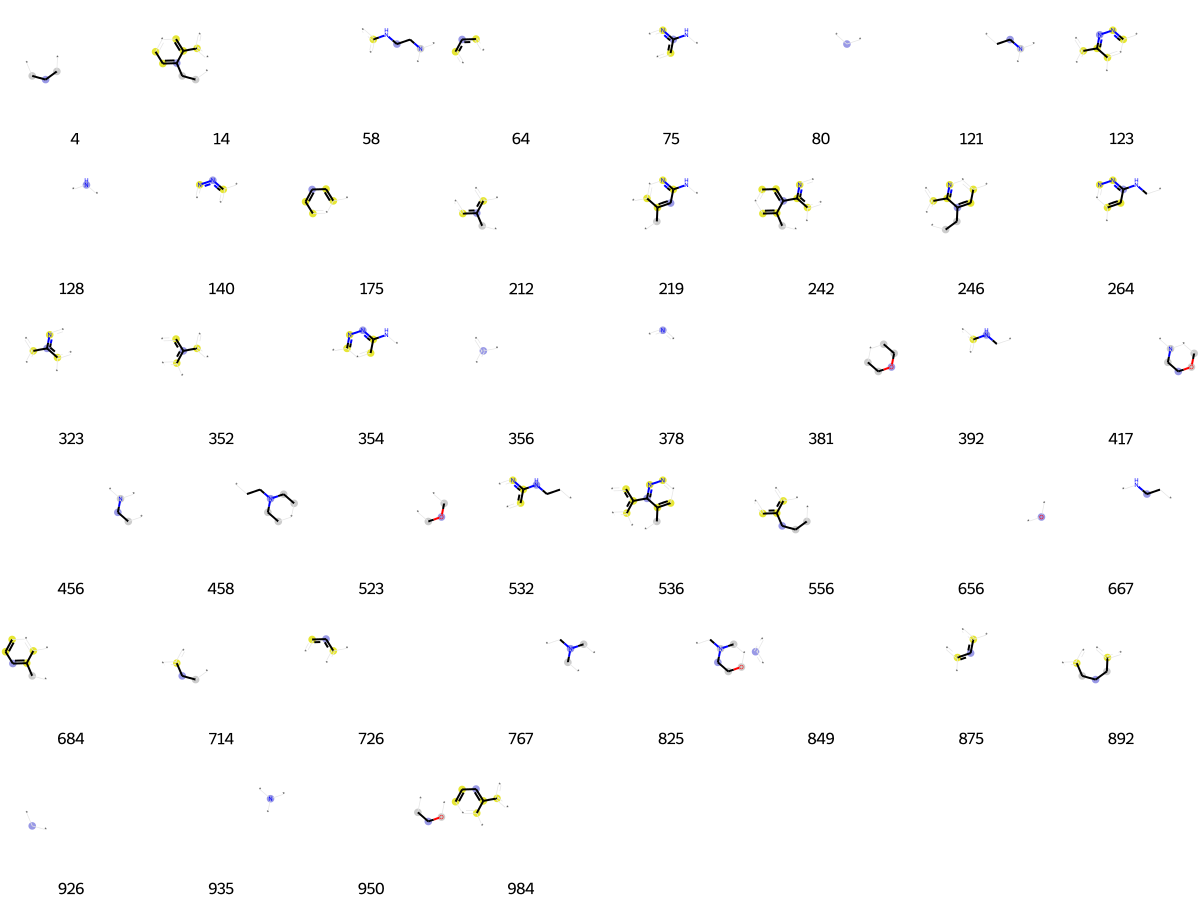

In [3604]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [3605]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[1,
 2,
 4,
 33,
 45,
 64,
 79,
 80,
 86,
 107,
 117,
 121,
 128,
 129,
 131,
 172,
 175,
 218,
 242,
 261,
 283,
 325,
 333,
 356,
 369,
 378,
 385,
 389,
 409,
 428,
 444,
 448,
 456,
 458,
 464,
 478,
 500,
 502,
 511,
 549,
 573,
 592,
 600,
 624,
 648,
 650,
 680,
 724,
 726,
 736,
 759,
 777,
 807,
 820,
 823,
 842,
 849,
 851,
 893,
 926,
 935,
 974,
 985,
 992]

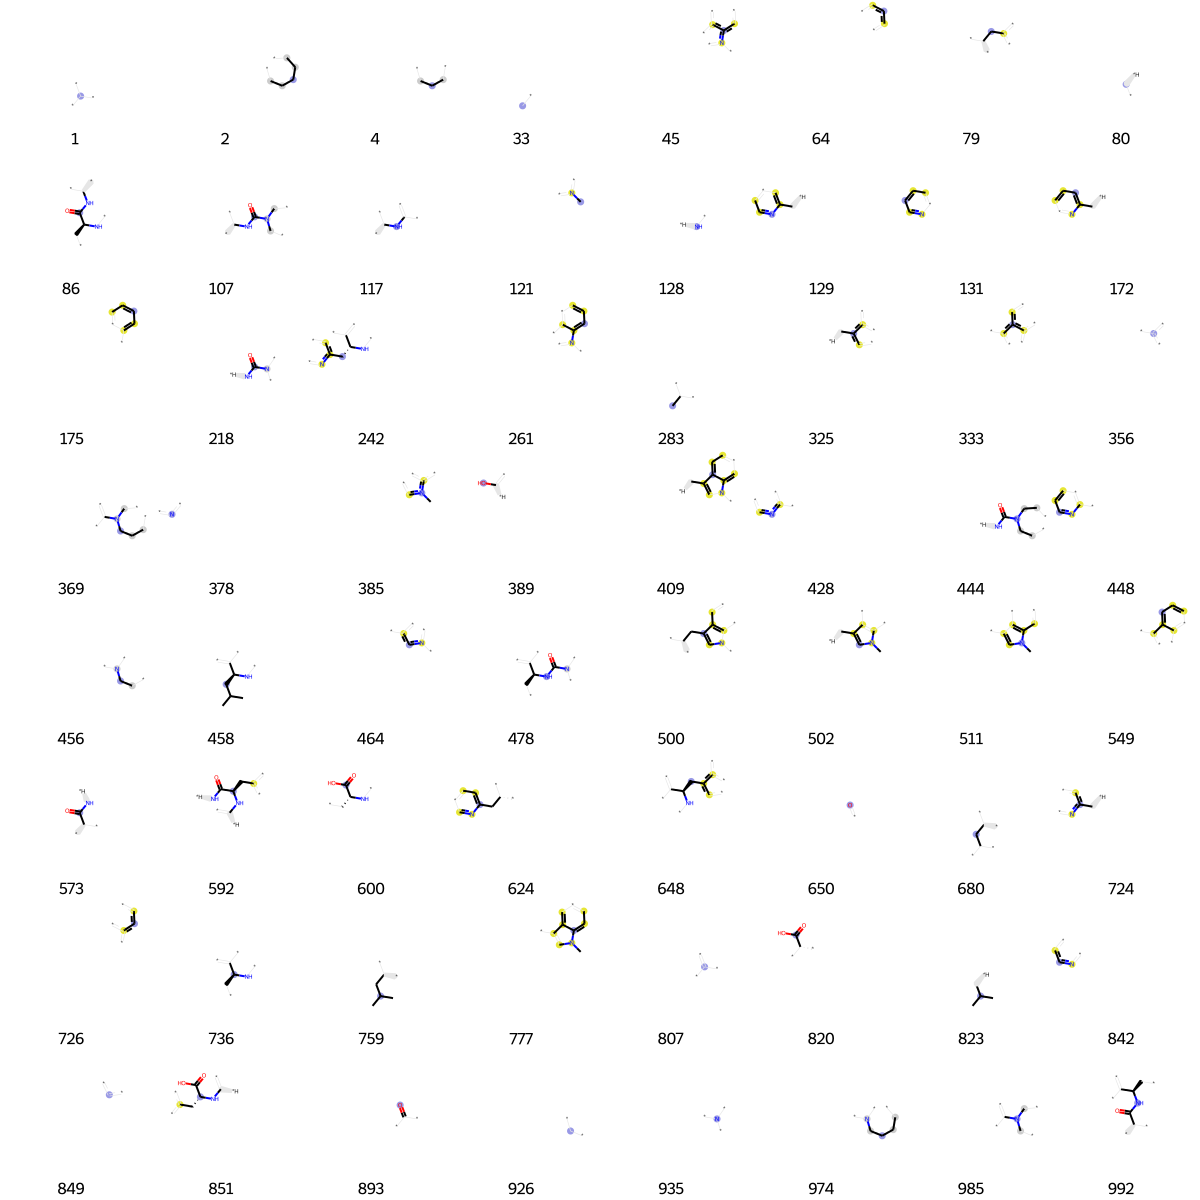

In [3606]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [3607]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[5,
 6,
 11,
 33,
 36,
 55,
 80,
 97,
 102,
 130,
 138,
 139,
 144,
 159,
 208,
 223,
 233,
 250,
 301,
 314,
 342,
 356,
 362,
 417,
 473,
 521,
 522,
 527,
 531,
 540,
 563,
 602,
 621,
 650,
 652,
 656,
 682,
 693,
 694,
 695,
 706,
 723,
 733,
 760,
 768,
 788,
 804,
 807,
 831,
 860,
 881,
 893,
 916,
 919,
 926,
 927,
 940,
 946,
 967,
 1017,
 1019]

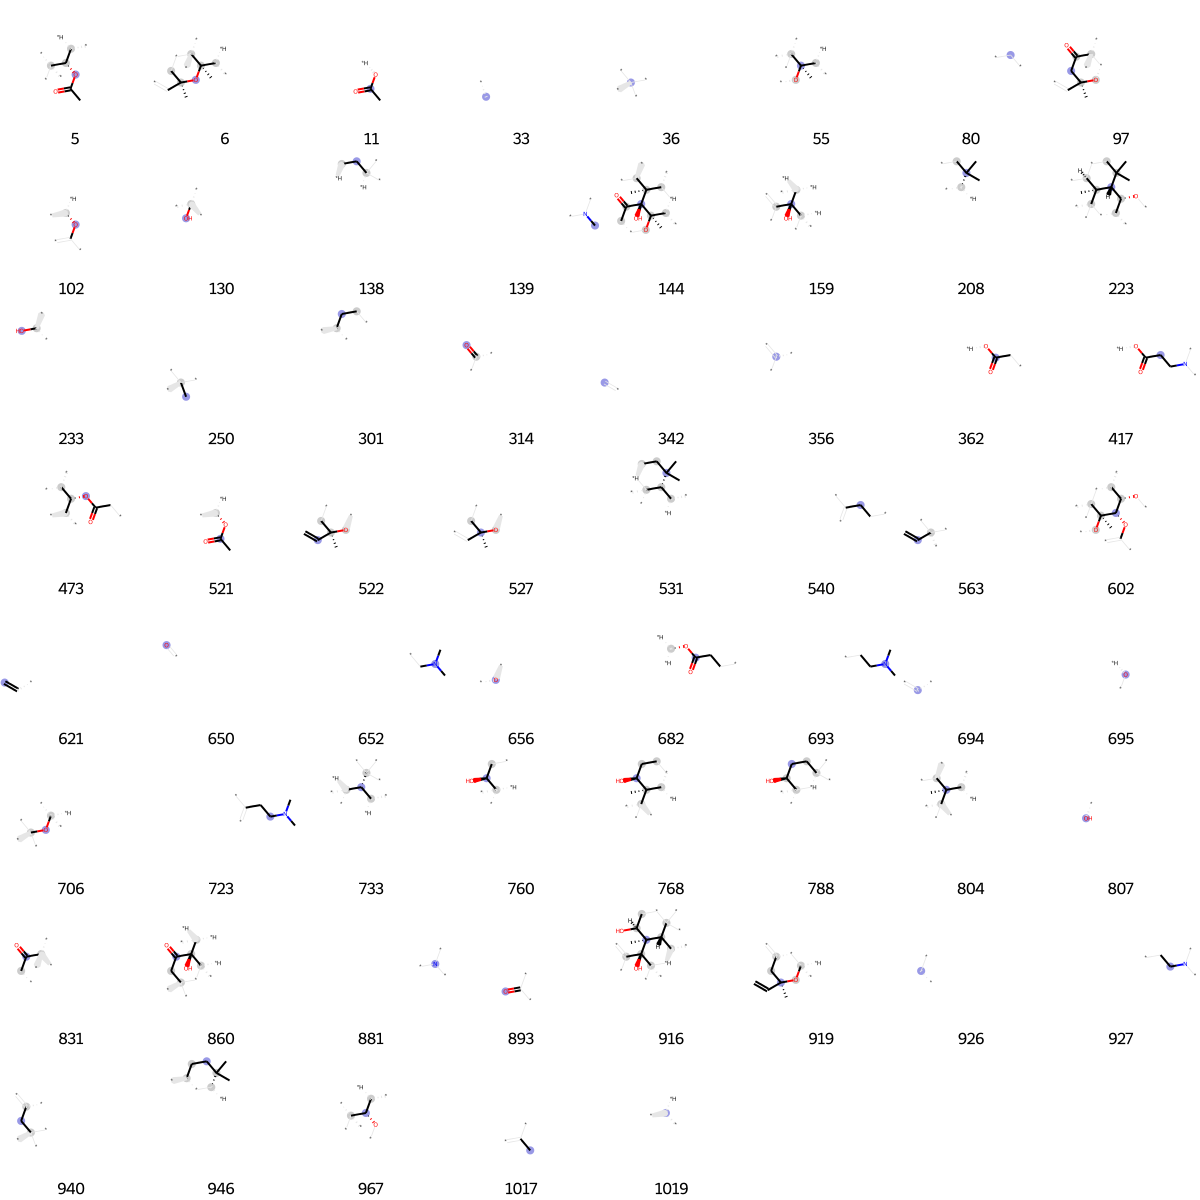

In [3608]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [3609]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 23,
 33,
 36,
 64,
 79,
 80,
 108,
 117,
 121,
 128,
 135,
 136,
 138,
 147,
 165,
 175,
 182,
 246,
 292,
 294,
 310,
 322,
 327,
 333,
 356,
 378,
 385,
 389,
 411,
 456,
 499,
 511,
 512,
 526,
 540,
 556,
 573,
 575,
 579,
 641,
 650,
 695,
 710,
 718,
 726,
 730,
 736,
 751,
 770,
 772,
 781,
 786,
 794,
 807,
 825,
 831,
 841,
 849,
 857,
 890,
 893,
 926,
 932,
 935,
 966,
 973,
 982,
 985,
 992,
 1006]

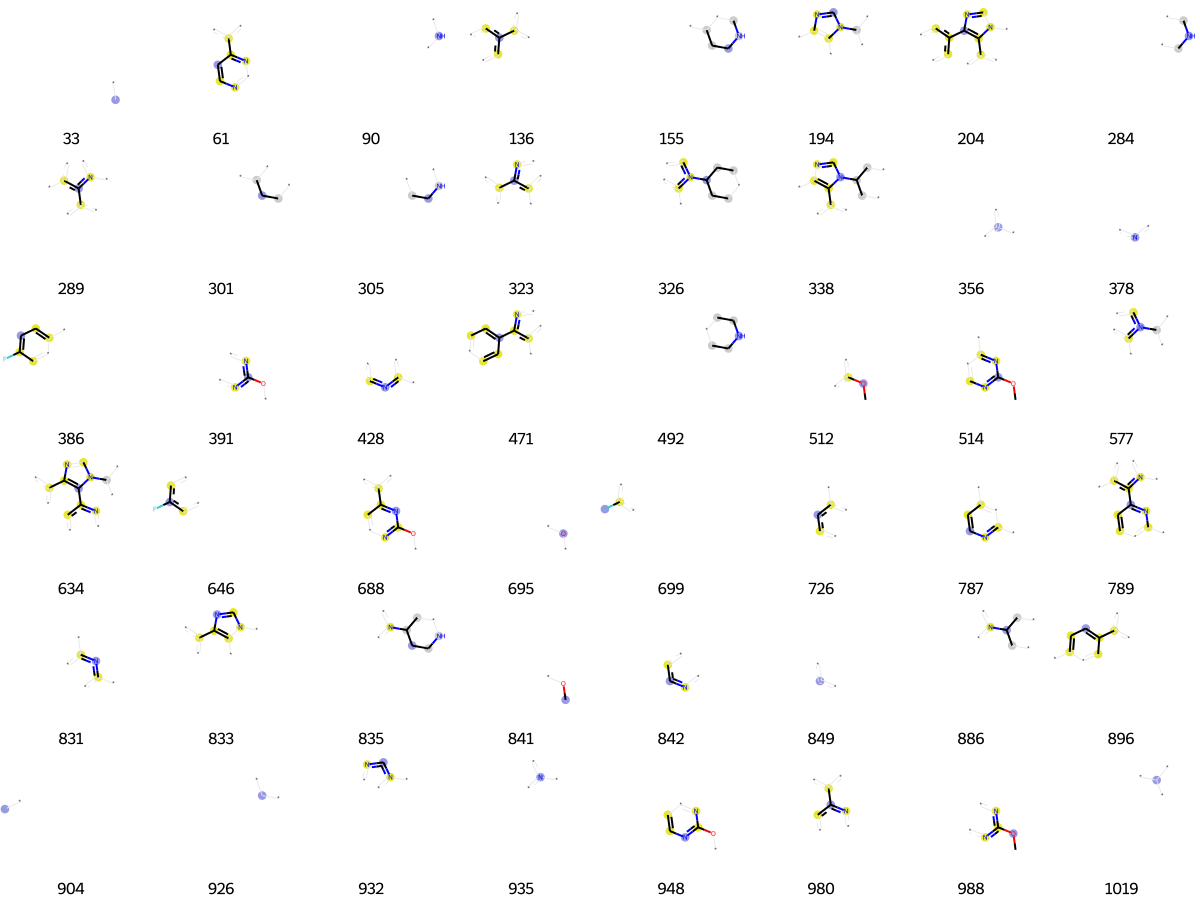

In [3610]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [3611]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 4,
 79,
 80,
 114,
 140,
 147,
 192,
 246,
 266,
 268,
 325,
 356,
 378,
 389,
 421,
 429,
 438,
 453,
 456,
 472,
 475,
 486,
 515,
 565,
 594,
 628,
 649,
 650,
 663,
 699,
 711,
 764,
 786,
 790,
 793,
 807,
 809,
 814,
 816,
 824,
 849,
 867,
 875,
 893,
 904,
 910,
 919,
 922,
 926,
 935,
 985,
 995,
 1004,
 1009]

In [3612]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[73,
 87,
 106,
 112,
 171,
 245,
 342,
 354,
 356,
 360,
 361,
 378,
 431,
 438,
 578,
 650,
 674,
 715,
 716,
 753,
 790,
 807,
 831,
 838,
 849,
 875,
 924,
 939,
 988]

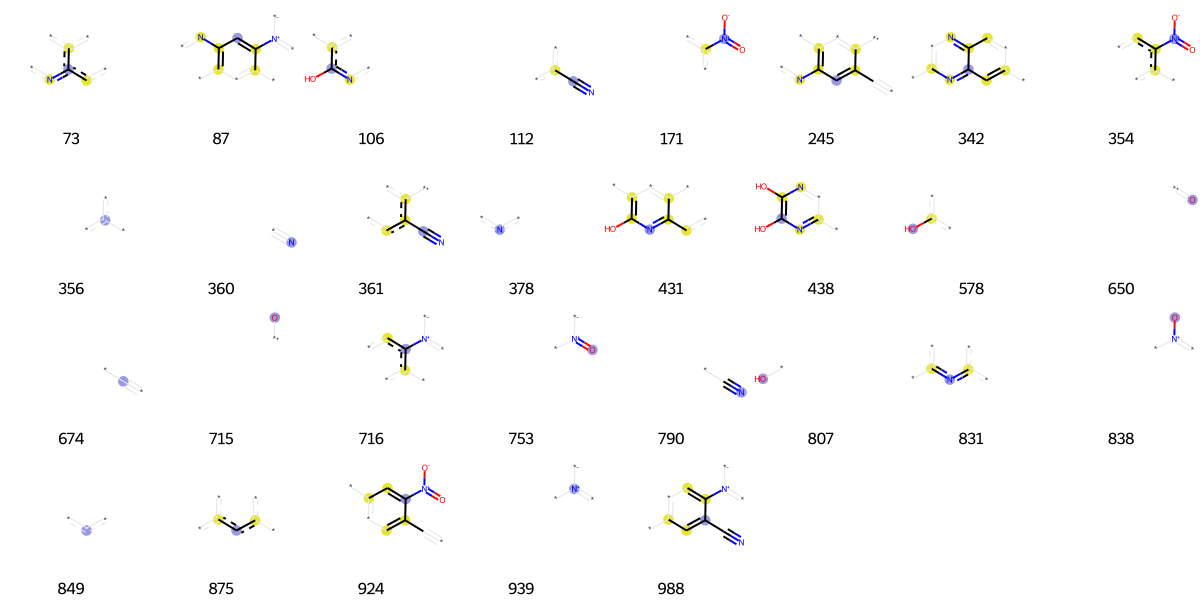

In [3613]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [3614]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[4,
 33,
 34,
 80,
 121,
 194,
 209,
 249,
 322,
 356,
 398,
 437,
 456,
 458,
 512,
 514,
 540,
 586,
 613,
 635,
 650,
 653,
 669,
 695,
 767,
 781,
 807,
 841,
 849,
 875,
 887,
 893,
 926,
 935,
 946,
 974,
 1021]

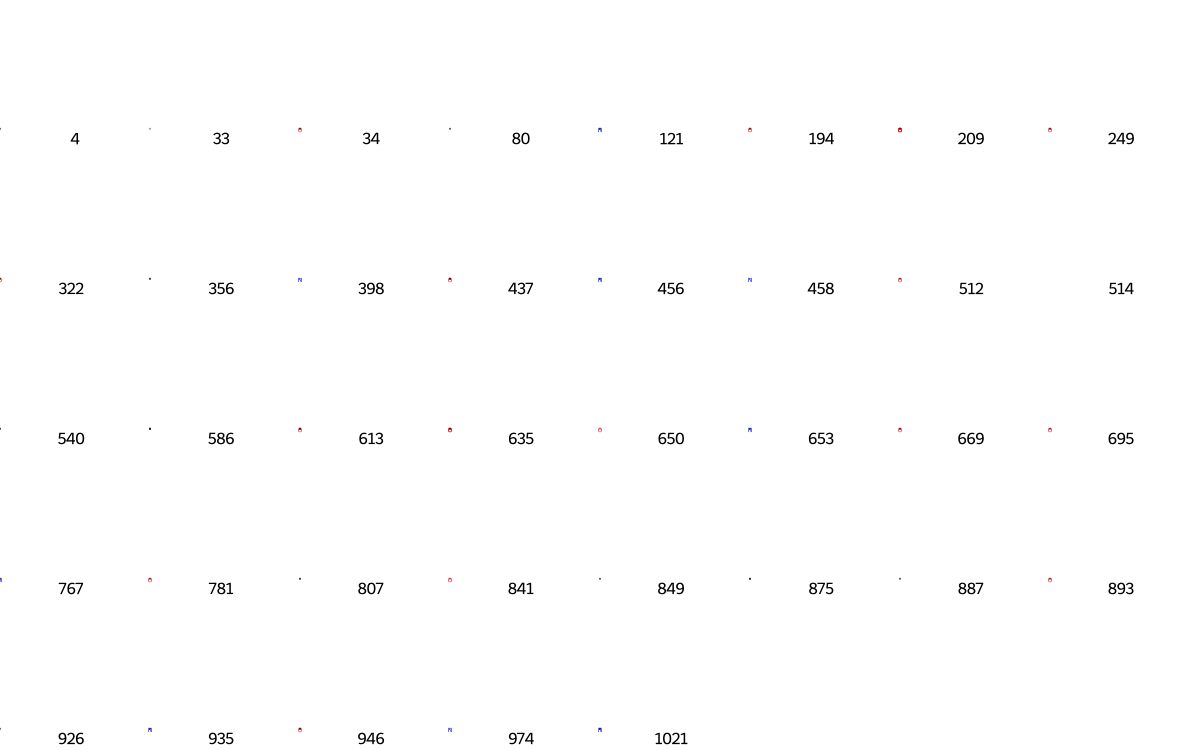

In [3615]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [3616]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[1,
 33,
 43,
 80,
 103,
 114,
 116,
 147,
 310,
 314,
 315,
 341,
 353,
 354,
 356,
 378,
 392,
 393,
 408,
 463,
 504,
 511,
 521,
 532,
 561,
 573,
 623,
 641,
 650,
 659,
 685,
 700,
 726,
 730,
 762,
 848,
 849,
 935,
 1011]

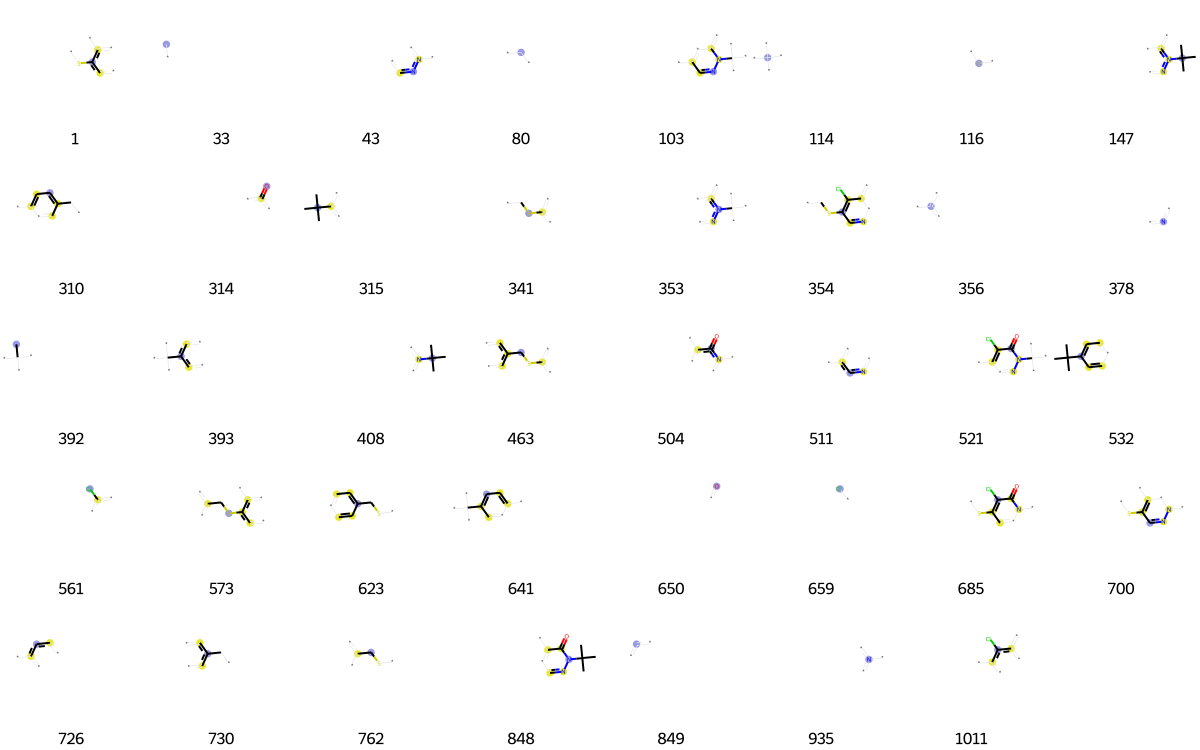

In [3617]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [3618]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[147,
 157,
 176,
 313,
 356,
 378,
 433,
 480,
 489,
 567,
 675,
 693,
 789,
 849,
 881,
 926]

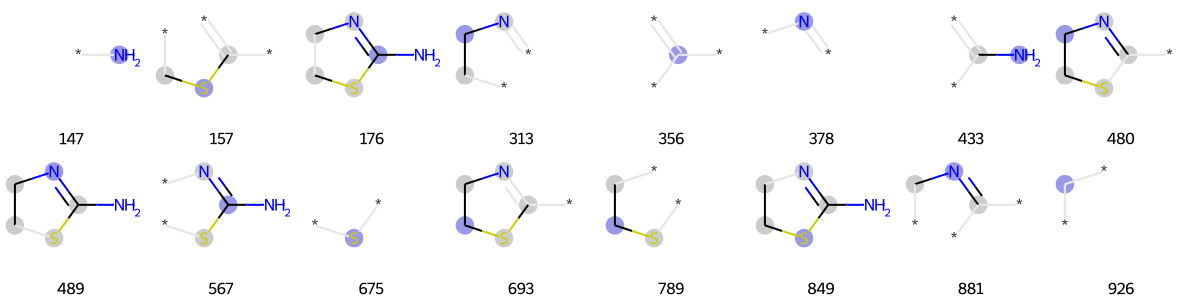

In [3619]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [3620]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[15,
 63,
 64,
 91,
 128,
 165,
 175,
 191,
 200,
 269,
 350,
 356,
 389,
 392,
 452,
 491,
 500,
 592,
 626,
 650,
 672,
 703,
 725,
 726,
 807,
 819,
 831,
 836,
 849,
 960,
 992]

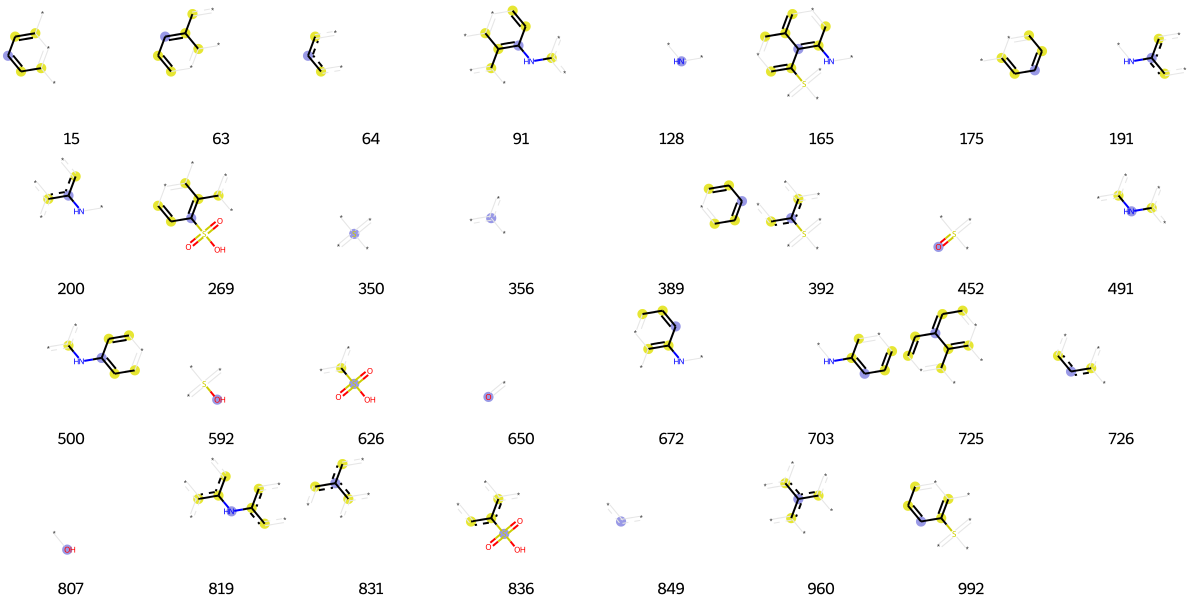

In [3621]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [3622]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[33,
 56,
 80,
 86,
 90,
 119,
 243,
 263,
 285,
 301,
 314,
 334,
 356,
 389,
 533,
 540,
 579,
 650,
 713,
 807,
 832,
 887,
 888,
 893,
 921,
 950,
 983,
 992,
 1002,
 1019]

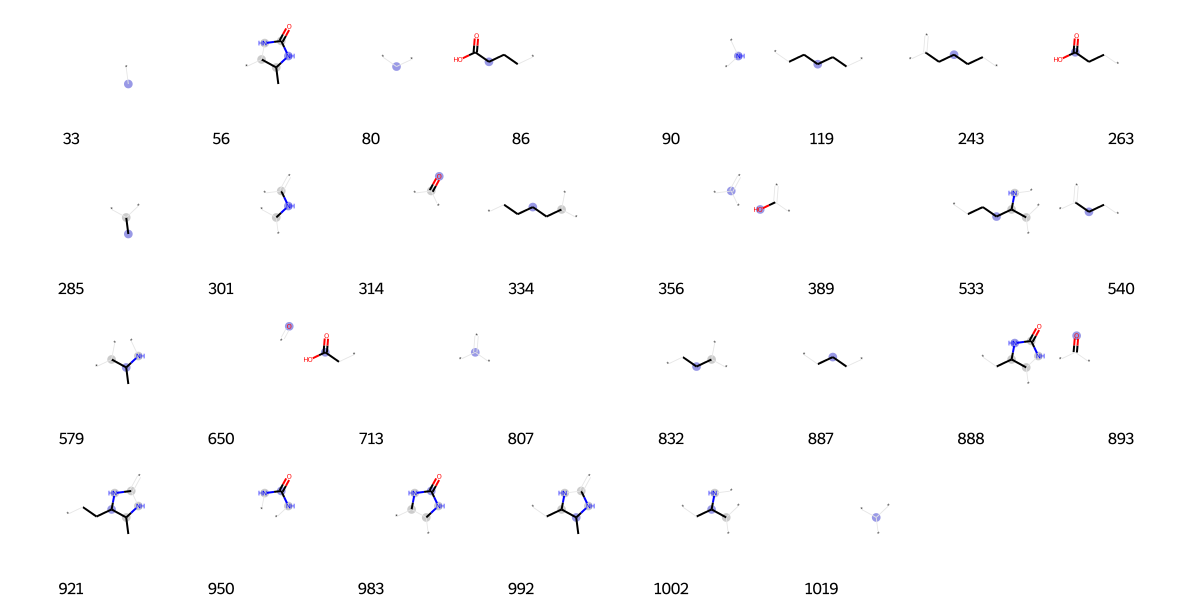

In [3623]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [3624]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[1,
 114,
 266,
 356,
 361,
 378,
 389,
 428,
 456,
 511,
 626,
 650,
 653,
 673,
 726,
 744,
 807,
 849,
 893,
 980]

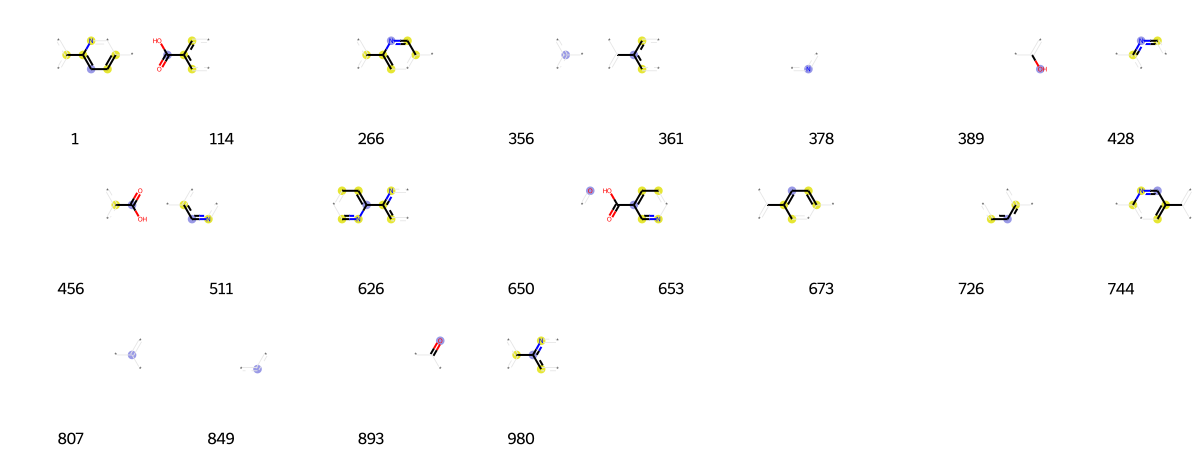

In [3625]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [3626]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[33,
 36,
 53,
 64,
 121,
 128,
 138,
 175,
 190,
 191,
 237,
 250,
 257,
 271,
 322,
 356,
 388,
 389,
 429,
 456,
 486,
 546,
 555,
 650,
 695,
 703,
 705,
 716,
 718,
 726,
 734,
 742,
 792,
 807,
 834,
 849,
 860,
 875,
 878,
 891,
 893,
 926,
 935,
 940,
 956,
 959,
 972,
 1019]

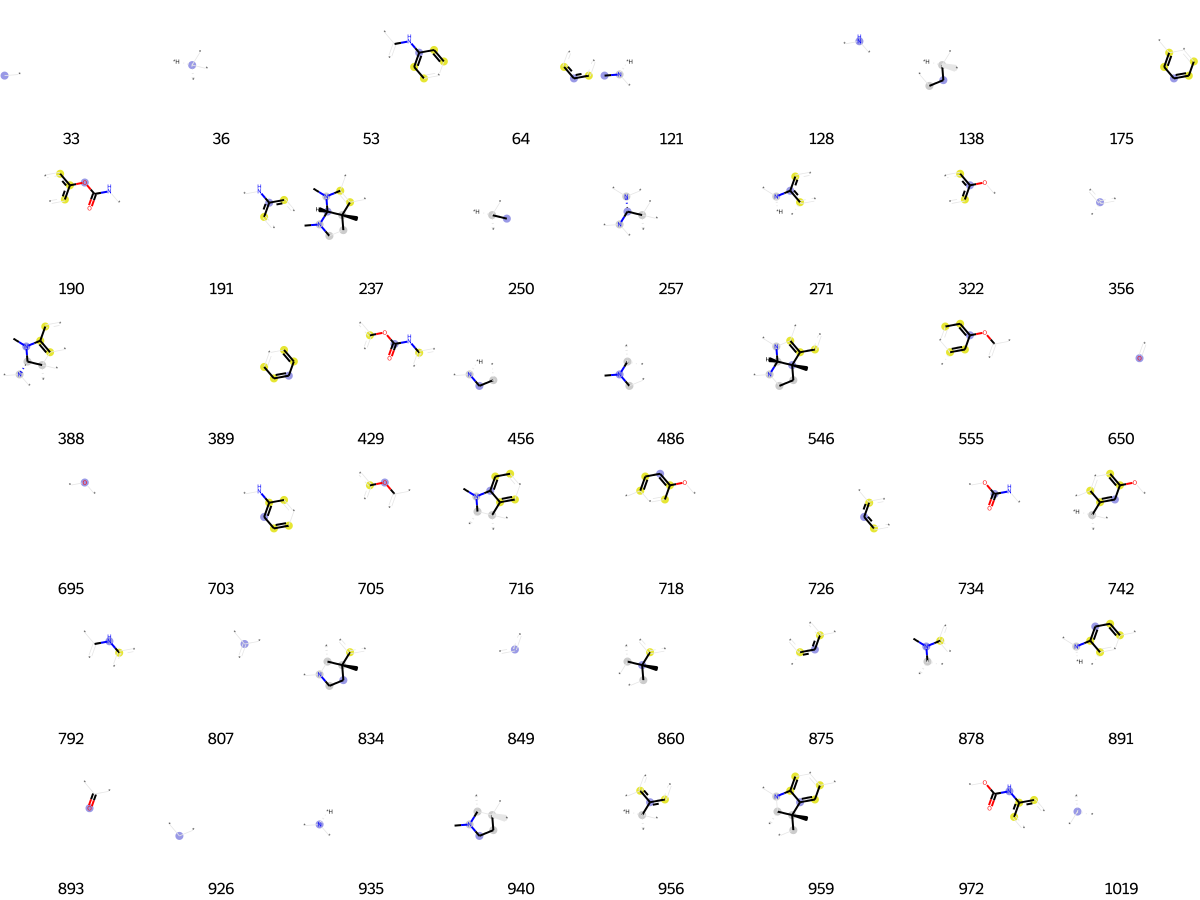

In [3627]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [3628]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[17,
 23,
 33,
 36,
 42,
 67,
 138,
 250,
 336,
 342,
 353,
 356,
 361,
 367,
 389,
 456,
 469,
 569,
 608,
 636,
 650,
 673,
 698,
 699,
 718,
 725,
 726,
 730,
 747,
 807,
 816,
 849,
 875,
 893,
 904,
 926,
 953,
 956,
 967,
 1022]

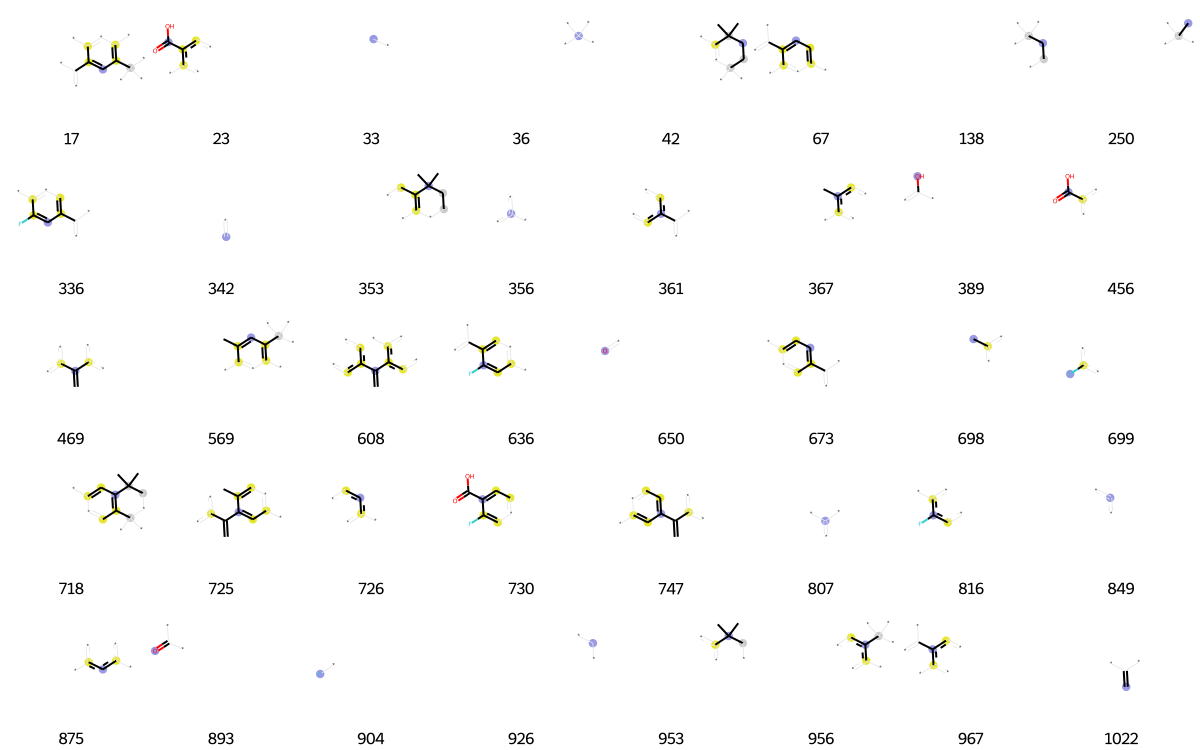

In [3629]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [3630]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 33,
 42,
 64,
 79,
 80,
 85,
 128,
 175,
 183,
 235,
 277,
 319,
 350,
 356,
 389,
 394,
 452,
 502,
 640,
 650,
 659,
 667,
 680,
 698,
 715,
 726,
 730,
 736,
 799,
 807,
 849,
 857,
 883,
 893,
 896,
 917,
 982,
 1022]

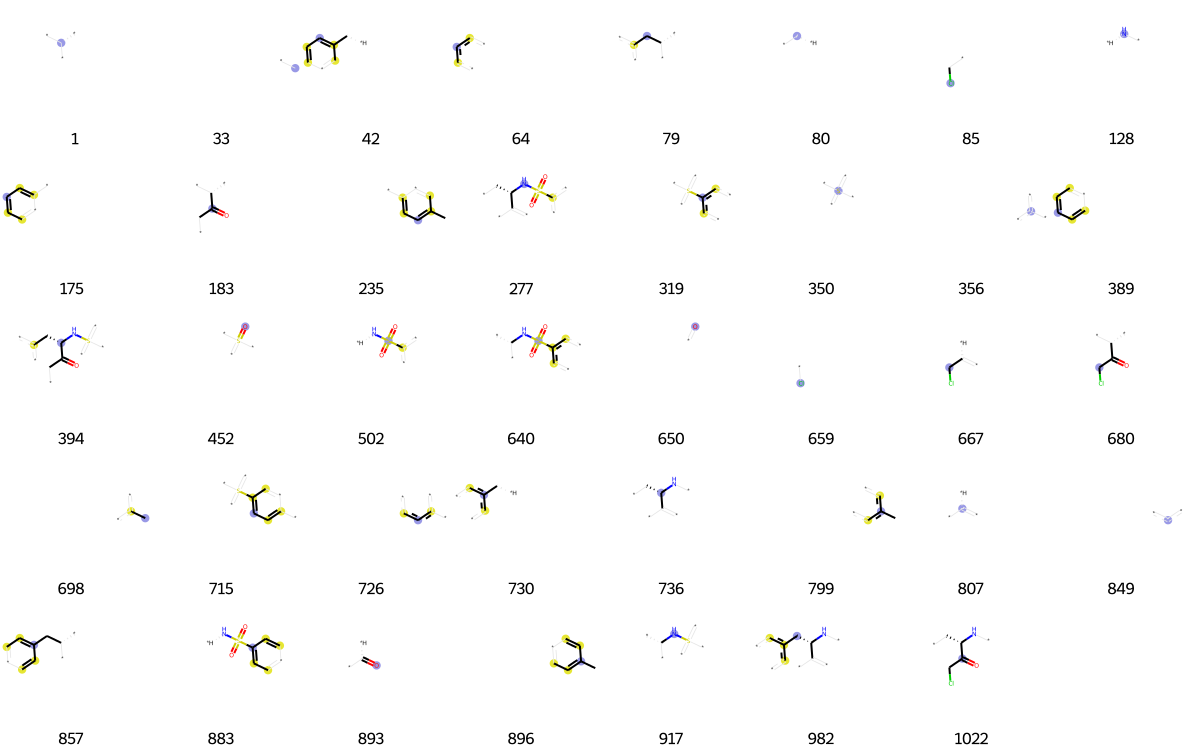

In [3631]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])